

# Project 2: Ames Housing Data and Kaggle Challenge

## Background

Heterogeneity in the housing market is often considered to be quite substantial as houses differ in size, location and quality, amongst other aspects. Home sellers often anchor their offer price to avoid underselling while home buyers, due to information asymmetry, often pay different prices for nearly identical houses. 

As a real estate brokerage firm, we aim to leverage on our market expertise and real estate data to help match prospective home sellers and buyers in Ames, Iowa. As a consultant in the business development team, I have been tasked to design a property price prediction model which can help our brokers provide useful insights and data-driven advice to prospective home sellers and buyers to aid them in their sale and purchase decisions.

The property price prediction model seeks to: 

1) Predict an estimated value of a house in Ames, given a set of housing features; and

2) Provide insights to home sellers on aspects of a home that home buyers are willing to pay for

#### Problem Statement

How much should home sellers sell their house for? How much budget is sufficient to buy a house of one's liking? What aspects of a home are buyers willing to pay for?

#### Data

Data used in the analysis:
* [`train.csv`](../datasets/train.csv): Information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010 (For training the models)
* [`test.csv`](../datasets/test.csv): Information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010 (For testing the models)

Data dictionary can be found in:
([`AmesHousing.txt`](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)).


#### Contents:

1. [Data Import](#1.Data-Import)
2. [Data Cleaning](#2.Data-Cleaning)
3. [Exploratary Data Analysis](#3.Exploratary-Data-Analysis)
4. [Preprocessing & Feature Engineering](#4.Preprocessing-&-Feature-Engineering)
5. [Model Selection](#5.Model-Selection)
6. [Conclusion and Recommendations](#6.Conclusion-and-Recommendations)
7. [Appendix](#7.Appendix)

## 1.Data Import

We will first perform the standard importing of libraries and loading of datasets.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from collections import OrderedDict, defaultdict

import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')
sns.set_context('poster')
%matplotlib inline 


In [2]:
# Load train and test datasets
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

## 2.Data Cleaning

We will then perform some inspection of the datasets before cleaning. 

### 2.1 Overview of Datasets

In [3]:
# Display first 2 rows of 'train' dataset
train.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  

[2 rows x 81 columns]

In [4]:
# Display shape of 'train' dataset
np.shape(train)

(2051, 81)

In [5]:
# Describe 'train' dataset
train.describe().transpose()

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [6]:
# Get info for 'train' dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
# Get columns in 'train' dataset
train_columns = train.columns
train_columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
# Check for duplicate 'Id' in 'train' dataset
duplicates = train.duplicated(subset=['Id'], keep=False)
train[duplicates]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

All rows/ Ids are unique for both 'train' datasets.

### 2.2 Rename Columns

In [9]:
# Convert the column names to lower case and drop spaces for 'train' dataset
train.columns = train.columns.str.replace(' ','_')
train.rename(str.lower, axis=1, inplace=True)

### 2.3 Investigate Null / Zero Values

Next, we will want to investigate if there are any null and zero values in the dataset.

In [10]:
# Check for columns with null values
null_values = train.isnull().sum()
null_values = null_values[null_values > 0].sort_values(ascending=False)
null_values

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

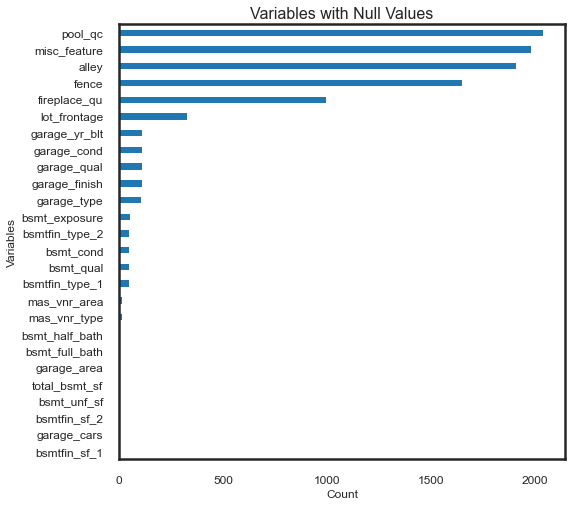

In [11]:
# Display null value plot
pd.Series(null_values[null_values > 0]).sort_values().plot.barh(figsize=(8,8))
plt.title('Variables with Null Values', fontsize = 16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Variables', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot
plt.savefig('../plots/nullplot.png', dpi=150, bbox_inches='tight')


There are null values in some columns.

In [12]:
# Find count of null values as a percentage total number of rows (i.e. 2051)
for key, value in null_values.items():
    x = round(value/len(train)*100,2)
    print (f'{key}: {value}, {x}%')

pool_qc: 2042, 99.56%
misc_feature: 1986, 96.83%
alley: 1911, 93.17%
fence: 1651, 80.5%
fireplace_qu: 1000, 48.76%
lot_frontage: 330, 16.09%
garage_yr_blt: 114, 5.56%
garage_cond: 114, 5.56%
garage_qual: 114, 5.56%
garage_finish: 114, 5.56%
garage_type: 113, 5.51%
bsmt_exposure: 58, 2.83%
bsmtfin_type_2: 56, 2.73%
bsmt_cond: 55, 2.68%
bsmt_qual: 55, 2.68%
bsmtfin_type_1: 55, 2.68%
mas_vnr_area: 22, 1.07%
mas_vnr_type: 22, 1.07%
bsmt_half_bath: 2, 0.1%
bsmt_full_bath: 2, 0.1%
total_bsmt_sf: 1, 0.05%
bsmt_unf_sf: 1, 0.05%
bsmtfin_sf_2: 1, 0.05%
garage_cars: 1, 0.05%
garage_area: 1, 0.05%
bsmtfin_sf_1: 1, 0.05%


**Inspecting columns with null-values**

The top columns with highest count of null-values are as follows (out of 2,051 rows):

**1) 'pool_qc'** : It is an ordinal variable which measures pool quality, ranging from Excellent (Ex) to Fair (Fa). Properties with no pools have an NA value. With a high percentage of 99.56% null-values, we can deduce that most properties in Ames, Iowa have no pools. 

**2) 'misc_feature'** : It is a nominal variable which measures miscellaneous features that are not covered in other categories (e.g. Elevator, 2nd Garage, Sheds, Tennis Courts). Properties with no additional miscellaneous features have an NA value. With a high percentage of 96.83% null-values, it indicates that most features in the properties have already been covered in the other categories as columns. There is little need to further split the miscellaneous features into additional columns. 

**3) 'alley'** : It is a nominal variable which describes the type of alley access to property, such as whether is Gravel (Grvl) or Paved (Pave). Properties with no alley access have an NA value. With a high percentage of 93.17% null-values, it indicates that most properties in Ames do not have alley access. 

**4) 'fence'** : It is an ordinal variable which describes the fence quality in terms of providing privacy. The values include, Good Privacy (GdPrv), Minimum Privacy (MdPrv), Good Wood (GdWo) and Minimum Wood/Wire (MnWw). Properties with no fences have an NA value. With a high percentage of 80.5% null-values, it indicates that most properties in Ames are not fenced. This is not surprising since Ames is largely an urban town ([Source](https://www.city-data.com/city/Ames-Iowa.html)).

**5) 'fireplace_qu'** : It is an ordinal variable which measures fireplace quality, ranging from Excellent (Ex) to Poor (Po). There are 1,000 null-values, which corresponds to the count of '0' integer values in 'Fireplaces' column. See the next code for verification.

**6) 'lot_frontage'** : It is a continuous variable measuring the linear feet of street connected to property. 

In [13]:
# Verify Number of null-values in 'Fireplace Qu' == Number of '0' values in 'Fireplaces' (discrete variable describing the number of fireplaces)
train[train['fireplaces']==0].shape 

(1000, 81)

In [14]:
# Check for zero values 
zero_values = train.isin([0]).sum()
zero_values = zero_values [zero_values > 0].sort_values(ascending=False)
zero_values

pool_area          2042
3ssn_porch         2025
low_qual_fin_sf    2018
misc_val           1986
bsmt_half_bath     1923
screen_porch       1870
bsmtfin_sf_2       1803
enclosed_porch     1724
half_bath          1308
mas_vnr_area       1216
bsmt_full_bath     1200
2nd_flr_sf         1191
wood_deck_sf       1075
fireplaces         1000
open_porch_sf       912
bsmtfin_sf_1        657
bsmt_unf_sf         165
garage_cars         113
garage_area         113
total_bsmt_sf        54
full_bath             8
bedroom_abvgr         5
kitchen_abvgr         2
dtype: int64

There are zero values in some columns.

In [15]:
# Find count of zero-values as a percentage total number of rows (i.e. 2051)
for key, value in zero_values.items():
    x = round(value/len(train)*100,2)
    print (f'{key}: {value}, {x}%')

pool_area: 2042, 99.56%
3ssn_porch: 2025, 98.73%
low_qual_fin_sf: 2018, 98.39%
misc_val: 1986, 96.83%
bsmt_half_bath: 1923, 93.76%
screen_porch: 1870, 91.18%
bsmtfin_sf_2: 1803, 87.91%
enclosed_porch: 1724, 84.06%
half_bath: 1308, 63.77%
mas_vnr_area: 1216, 59.29%
bsmt_full_bath: 1200, 58.51%
2nd_flr_sf: 1191, 58.07%
wood_deck_sf: 1075, 52.41%
fireplaces: 1000, 48.76%
open_porch_sf: 912, 44.47%
bsmtfin_sf_1: 657, 32.03%
bsmt_unf_sf: 165, 8.04%
garage_cars: 113, 5.51%
garage_area: 113, 5.51%
total_bsmt_sf: 54, 2.63%
full_bath: 8, 0.39%
bedroom_abvgr: 5, 0.24%
kitchen_abvgr: 2, 0.1%


**Inspecting columns with zero-values**

The top columns with highest count of zero-values are as follows (out of 2,051 rows):

**1) 'pool_area'** : It is a continuous variable measuring pool area in square feet. There are 2,042 zero-values, which corresponds to the count of 'NA' values in 'pool_qc' column as explained above.

**2) '3ssn_porch'** : It is a continuous variable measuring three season porch area in square feet. We can assume the zero-values to mean that there are no three season porch for 98.73% of the properties.

**3) 'low_qual_fin_sf'** : It is a continuous variable measuring low quality finished square feet (all floors). With a high percentage of 98.39% zero-values, it indicates that the quality of the floors for most properties in Ames have been well-maintained. 

**4) 'misc_val'** : It is a continuous variable measuring $value of miscellaneous feature. There are 1,986 zero-values, which corresponds to the count of 'NA' values in 'misc_feature' column as explained above.

**5) 'bsmt_half_bath'** and **'bsmt_full_bath'** : They are discrete variables measuring the number of half bathrooms/full bathrooms in the basement. There are more properties without half bathrooms(1,923) than full bathrooms (1,200) in the basement.

**6) 'screen_porch'** : It is a continuous variable measuring screen porch area in square feet. We can assume the zero-values to mean that there are no Screen Porch for 91.18% of the properties. 

**7) 'bsmtfin_sf_2'** and **'bsmtbin_sf_1'**: They are continuous variable measuring finished square footage of Type 2 and Type 1 basements. We can assume the zero-values for 'bsmtfin_sf_2' to mean that there are 1,803 properties with Unfinished (Unf) or No Basement (NA) for 'bsmtfintype_2' column, where it is an ordinal variable measuring the rating of basement finished area. Similarly, we can assume the zero-values for 'bsmtfin_sf_1' to mean that there are 657 properties with Unfinished (Unf) or No Basement (NA) for 'bsmtfintype_1' column.

**8) 'enclosed_porch'** : It is a continuous variable measuring enclosed porch area in square feet. We can assume the zero-values to mean that there are no enclosed porches for 84.06% of the properties.

**9) 'half_bath'** : It is a discrete variable measuring the number of half bathrooms, excluding basement. 63.77% of the properties do not have half bathrooms, excluding basements.

**10) 'mas_vnr_area'** : It is a continuous variable measuring the masonry veneer area in square feet. 59.29% of the properties do not have masonry veneers.

**11) '2nd_flr_sf'** : It is a continuous variable measuring square footage of the second floor. 

**12) 'wood_deck_sf'** : It is a continuous variable measuring square footage of wood decking. 52.41% of the properties do not have wood deckings.


### 2.4 Clean Null / Zero Values

Generally, null-values were imputed with 'None' (mainly for ordinal variables) or '0' (mainly for continuous variables). 

#### Pool Quality,  Miscellaneous Features, Alley, Fence, Fireplace Quality

In [16]:
# Replace NA values with 'None'
train['pool_qc'] = train['pool_qc'].fillna('None')
train['misc_feature'] = train['misc_feature'].fillna('None')
train['alley'] = train['alley'].fillna('None')
train['fence'] = train['fence'].fillna('None')
train['fireplace_qu'] = train['fireplace_qu'].fillna('None')

#### Lot Frontage

In [17]:
# Find mean of 'lot_frontage'
train['lot_frontage'].mean()

69.05520046484602

In [18]:
# Replace NA value with mean
train['lot_frontage'] = train['lot_frontage'].fillna(train['lot_frontage'].mean())

In [19]:
# Convert dtype from float to int for 'lot_frontage'
train['lot_frontage'] = train['lot_frontage'].astype('int')

#### Garage Area, Condition, Quality, Finish, Type, Year Built

In [20]:
# Display properties where'garage_area' has null-values
pd.set_option('display.max_columns', 100)
train[train['garage_area'].isnull()==True]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1712  2237  910201180           70        RM            50      9060   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1712  None       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1712       IDOTRR        Norm        Norm      1Fam      2Story             5   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1712             6        1923            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1712      Wd Sdng      Plywood         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1712         548.0            Unf           0.0        311.0          859.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712    GasA         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0         None      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712           NaN          NaN          NaN         NaN         NaN   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0    None  MnPrv         None         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

The values for 'garage_area' and 'garage_type' contradicts because 'garage_area' == null-value but 'garage_type'== 'Detached from home'. The other 'garage_cols' are also null. 

Hence, the decision is to drop this row to avoid subjectivity in the imputation. 

In [21]:
# Drop row index 1712 and reset index
train.drop(1712, inplace=True)
train.reset_index(drop=True, inplace=True)

The 'garage_cond', 'garage_qual', 'garage_finish' and 'garage_type' columns contain more than 100 null-values. 

Since properties whose 'garage_area'== 0, imply that they do not have garages, we can impute 'None' for the corresponding 'garage_cond', 'garage_qual','garage_finish' and 'garage_type' columns. 

In [22]:
# Create list of columns that contains 'garage'
garage_cols = train.columns[train.columns.str.contains('garage')]
garage_cols

Index(['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond'],
      dtype='object')

In [23]:
# Display properties where 'garage_area' column == 0 (i.e. no garage)
pd.set_option('display.max_rows', 500)
train[train['garage_area']==0][['garage_area', 'garage_cond', 'garage_qual','garage_finish', 'garage_type']]

garage_area garage_cond garage_qual garage_finish garage_type
28            0.0         NaN         NaN           NaN         NaN
53            0.0         NaN         NaN           NaN         NaN
65            0.0         NaN         NaN           NaN         NaN
79            0.0         NaN         NaN           NaN         NaN
101           0.0         NaN         NaN           NaN         NaN
103           0.0         NaN         NaN           NaN         NaN
114           0.0         NaN         NaN           NaN         NaN
120           0.0         NaN         NaN           NaN         NaN
134           0.0         NaN         NaN           NaN         NaN
136           0.0         NaN         NaN           NaN         NaN
139           0.0         NaN         NaN           NaN         NaN
162           0.0         NaN         NaN           NaN         NaN
235           0.0         NaN         NaN           NaN         NaN
256           0.0         NaN         NaN           NaN         NaN
260           0.0         NaN         NaN           NaN         NaN
264           0.0         NaN         NaN           NaN         NaN
276           0.0         NaN         NaN           NaN         NaN
334           0.0         NaN         NaN           NaN         NaN
356           0.0         NaN         NaN           NaN         NaN
382           0.0         NaN         NaN           NaN         NaN
406           0.0         NaN         NaN           NaN         NaN
409           0.0         NaN         NaN           NaN         NaN
426           0.0         NaN         NaN           NaN         NaN
437           0.0         NaN         NaN           NaN         NaN
445           0.0         NaN         NaN           NaN         NaN
457           0.0         NaN         NaN           NaN         NaN
486           0.0         NaN         NaN           NaN         NaN
530           0.0         NaN         NaN           NaN         NaN
542           0.0         NaN         NaN           NaN         NaN
555           0.0         NaN         NaN           NaN         NaN
562           0.0         NaN         NaN           NaN         NaN
579           0.0         NaN         NaN           NaN         NaN
580           0.0         NaN         NaN           NaN         NaN
612           0.0         NaN         NaN           NaN         NaN
636           0.0         NaN         NaN           NaN         NaN
653           0.0         NaN         NaN           NaN         NaN
663           0.0         NaN         NaN           NaN         NaN
689           0.0         NaN         NaN           NaN         NaN
692           0.0         NaN         NaN           NaN         NaN
700           0.0         NaN         NaN           NaN         NaN
705           0.0         NaN         NaN           NaN         NaN
708           0.0         NaN         NaN           NaN         NaN
722           0.0         NaN         NaN           NaN         NaN
736           0.0         NaN         NaN           NaN         NaN
741           0.0         NaN         NaN           NaN         NaN
783           0.0         NaN         NaN           NaN         NaN
787           0.0         NaN         NaN           NaN         NaN
791           0.0         NaN         NaN           NaN         NaN
814           0.0         NaN         NaN           NaN         NaN
822           0.0         NaN         NaN           NaN         NaN
824           0.0         NaN         NaN           NaN         NaN
858           0.0         NaN         NaN           NaN         NaN
878           0.0         NaN         NaN           NaN         NaN
901           0.0         NaN         NaN           NaN         NaN
942           0.0         NaN         NaN           NaN         NaN
943           0.0         NaN         NaN           NaN         NaN
951           0.0         NaN         NaN           NaN         NaN
959           0.0         NaN         NaN           NaN       

In [24]:
# Display number of rows
train[train['garage_area']==0][garage_cols].shape

(113, 7)

From the above,'garage_area' for 113 properties is 0 and their corresponding ordinal variables for garage have null-values. 

Hence, the corresponding null-values in 'garage_cond', 'garage_qual', 'garage_finish' and 'garage_type' can be replaced with 'None'.

In [25]:
# Replace NA values with 'None'
train['garage_cond'] = train['garage_cond'].fillna('None')
train['garage_qual'] = train['garage_qual'].fillna('None')
train['garage_finish'] = train['garage_finish'].fillna('None')
train['garage_type'] = train['garage_type'].fillna('None')

The 'garage_yr_blt' column has null-values. We can assume it to be the same as the value for 'year_built' and impute 'garage_yr_blt' with values from 'year_built'.

In [26]:
# Impute 'garage_yr_blt' with values from 'year_built'
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(train['year_built'])

#### Basement Exposure, Type, Condition, Quality, Half Bathrooms, Full Bathrooms

In [27]:
# Display properties where'total_bsmt_sf' has null-values
pd.set_option('display.max_columns', 100)
train[train['total_bsmt_sf'].isnull()==True]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM            99      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327  None       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc       NaN       NaN           NaN            NaN   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN            NaN           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0         None      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0    None  MnPrv         None         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

The values for 'total_bsmt_sf' and other 'basement_cols' are null. This implies that there is likely no basement for this property. Hence, we can impute its 'basement_cols' with '0' or 'None'.

In [28]:
# Replace 'basement_cols' for row index 1327 with '0' or "None"
train.at[1327,'bsmt_qual'] = 'None'
train.at[1327,'bsmt_cond'] = 'None'
train.at[1327,'bsmt_exposure'] = 'None'
train.at[1327,'bsmtfin_type_1'] = 'None'
train.at[1327,'bsmtfin_sf_1'] = 0
train.at[1327,'bsmtfin_type_2'] = 'None'
train.at[1327,'bsmtfin_sf_2'] = 0
train.at[1327,'bsmt_unf_sf'] = 0
train.at[1327,'total_bsmt_sf'] = 0
train.at[1327,'bsmt_full_bath'] = 0
train.at[1327,'bsmt_half_bath'] = 0

In [29]:
# Create list of columns that contains 'bsmt'
basement_cols = train.columns[train.columns.str.contains('bsmt')]
basement_cols

Index(['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath'],
      dtype='object')

In [30]:
# Display properties where 'total_bsmt_sf' column == 0 (i.e. no basement)
pd.set_option('display.max_rows', 500)
train[train['total_bsmt_sf']==0][['total_bsmt_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
                                      'bsmt_unf_sf', 'bsmtfin_type_1','bsmtfin_type_2',
                                      'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
                                      'bsmt_full_bath', 'bsmt_half_bath']]

total_bsmt_sf  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf bsmtfin_type_1  \
12              0.0           0.0           0.0          0.0            NaN   
93              0.0           0.0           0.0          0.0            NaN   
114             0.0           0.0           0.0          0.0            NaN   
146             0.0           0.0           0.0          0.0            NaN   
183             0.0           0.0           0.0          0.0            NaN   
240             0.0           0.0           0.0          0.0            NaN   
249             0.0           0.0           0.0          0.0            NaN   
256             0.0           0.0           0.0          0.0            NaN   
390             0.0           0.0           0.0          0.0            NaN   
437             0.0           0.0           0.0          0.0            NaN   
485             0.0           0.0           0.0          0.0            NaN   
499             0.0           0.0           0.0          0.0            NaN   
514             0.0           0.0           0.0          0.0            NaN   
580             0.0           0.0           0.0          0.0            NaN   
581             0.0           0.0           0.0          0.0            NaN   
616             0.0           0.0           0.0          0.0            NaN   
635             0.0           0.0           0.0          0.0            NaN   
642             0.0           0.0           0.0          0.0            NaN   
696             0.0           0.0           0.0          0.0            NaN   
700             0.0           0.0           0.0          0.0            NaN   
737             0.0           0.0           0.0          0.0            NaN   
772             0.0           0.0           0.0          0.0            NaN   
790             0.0           0.0           0.0          0.0            NaN   
794             0.0           0.0           0.0          0.0            NaN   
924             0.0           0.0           0.0          0.0            NaN   
933             0.0           0.0           0.0          0.0            NaN   
954             0.0           0.0           0.0          0.0            NaN   
1007            0.0           0.0           0.0          0.0            NaN   
1022            0.0           0.0           0.0          0.0            NaN   
1049            0.0           0.0           0.0          0.0            NaN   
1089            0.0           0.0           0.0          0.0            NaN   
1098            0.0           0.0           0.0          0.0            NaN   
1125            0.0           0.0           0.0          0.0            NaN   
1157            0.0           0.0           0.0          0.0            NaN   
1211            0.0           0.0           0.0          0.0            NaN   
1222            0.0           0.0           0.0          0.0            NaN   
1252            0.0           0.0           0.0          0.0            NaN   
1256            0.0           0.0           0.0          0.0            NaN   
1270            0.0           0.0           0.0          0.0            NaN   
1327            0.0           0.0           0.0          0.0           None   
1331            0.0           0.0           0.0          0.0            NaN   
1377            0.0           0.0           0.0          0.0            NaN   
1387            0.0           0.0           0.0          0.0            NaN   
1428            0.0           0.0           0.0          0.0            NaN   
1481            0.0           0.0           0.0          0.0            NaN   
1594            0.0           0.0           0.0          0.0            NaN   
1620            0.0           0.0           0.0          0.0            NaN   
1681            0.0           0.0           0.0          0.0            NaN   
1684            0.0           0.0           0.0          0.0            NaN   
1686            0.0           0.0           0.0         

In [31]:
# Display number of rows
train[train['total_bsmt_sf']==0][basement_cols].shape

(55, 11)

From the above,'total_bsmt_sf' for 55 properties is 0 and their corresponding ordinal variables for basement have null-values. 

Hence, the corresponding null-values in 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_qual', 'bsmt_cond' and 'bsmt_exposure' can be replaced with 'None'.

In [32]:
# Replace NA values with 'None'
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].fillna('None')
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].fillna('None')
train['bsmt_qual'] = train['bsmt_qual'].fillna('None')
train['bsmt_cond'] = train['bsmt_cond'].fillna('None')
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('None')

In [33]:
# Display properties where other'basement_cols' have null-values
train[train['bsmt_full_bath'].isnull()==True]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
616  1498  908154080           20        RL           123     47007   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
616  None       IR1          Lvl    AllPub     Inside        Gtl      Edwards   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
616        Norm        Norm      1Fam      1Story             5             7   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
616        1959            1996      Gable   CompShg      Plywood   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
616      Plywood         None           0.0         TA         TA       Slab   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
616      None      None          None           None           0.0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
616           None           0.0          0.0            0.0    GasA   

    heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
616         TA           Y      SBrkr        3820           0   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                0         3820             NaN             NaN          3   

     half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616          1              5              1           Ex             11   

    functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
616        Typ           2           Gd      Attchd         1959.0   

    garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616           Unf          2.0        624.0          TA          TA   

    paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
616           Y             0            372               0           0   

     screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
616             0          0    None  None         None         0        7   

     yr_sold sale_type  saleprice  
616     2008       WD      284700

For row id 1498,'bsmt_half_bath' and 'bsmt_full_bath' contain null-values, which can be replaced with '0' since there is no basement for this property. 

In [34]:
# Replace NA values with 'None'
train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)

#### Masonry Veneer Area and Type

In [35]:
# Replace NA values with '0' for continuous variable 
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

In [36]:
# Replace NA values with 'None' for nominal variable
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

#### Checks After Preliminary Cleaning

In [37]:
# Check for any remaining null values after prelim cleaning
train.isnull().sum().max()

0

There are now no null values in our dataset. 

### 2.5 Date Boundaries

As the dataset contains sales data from 2006 to 2010, we want to check if there are any data falling outside of this range and remove them accordingly.

In [38]:
# For ref
year_col = ['year_built', 'year_remod/add', 'yr_sold', 'garage_yr_blt']

In [39]:
# Check for future-dated values
train[train['year_built'] > 2010] 

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [40]:
# Check that there are no 'year_remod/add' after 2010
train[train['year_remod/add'] > 2010]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [41]:
# Check that there are no properties where 'yr_sold' is between 2006 and 2010
train[train['yr_sold'] > 2010] | train[train['yr_sold'] < 2006] 

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

In [42]:
# Check that there are no 'garage_yr_blt' after 2010
train[train['garage_yr_blt'] > 2010]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1699  2261  916384070           20        RL            68      8298   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1699  None       IR1          HLS    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1699             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1699      VinylSd      VinylSd         None           0.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1699         583.0            Unf           0.0        963.0         1546.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1699                0         1564             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1699          0              2              1           Ex              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1699        Typ           1           Gd      Attchd         2207.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1699           RFn          2.0        502.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1699           Y           132              0               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1699             0          0    None  None         None         0        9   

      yr_sold sale_type  saleprice  
1699     2007       New     267300

For row id 2261, the 'garage_yr_blt' value is 2207 which is future-dated and likely to be an error. Since the property was remodelled in 2007, we can assume that the garage was built around the same time and assign 'garage_yr_blt' as '2007'.

In [43]:
# Replace '2207' in garage_yr_blt' with '2007'
train['garage_yr_blt'].replace({2207: 2007}, inplace=True)

We noticed that the data type for 'garage_yr_blt' is a float, hence we need to change it to an integer. 

In [44]:
# Convert dtype from float to int for 'garage_yr_blt'
train['garage_yr_blt'] = train['garage_yr_blt'].astype('int')

In [45]:
# Check dtypes
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage         int32
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

The data types appear to be in order.

## 3.Exploratary Data Analysis

Next, we want to perform some quick high-level visualisation of the data. 

In [46]:
# Create list of numeric and categorical features
num_features = [col for col in train._get_numeric_data().columns]
cat_features = [col for col in train.select_dtypes(include=['object']).columns]

### 3.1 Histograms of Numeric Variables

In [47]:
# Create function for plotting histograms of numeric features 
def plot_histograms(dataframe, list_of_columns, list_of_titles, sharex=False, sharey=False, kde=False):
    ncols = 4
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,nrows*2.5), sharex=sharex, sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        # Calculate mean
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='--', color='crimson')
        
        # Set color of graph according to type
        if 'bsmt' in column:
            color = 'teal'
        elif 'garage' in column:
            color = 'darkorange'
        elif 'porch' in column:
            color = 'grey'
        else :
            color = 'darkblue'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], bins=25)
        sns.set(font_scale=1.1)
        ax[i].set_title(list_of_titles[i] + f' (Mean: {mean:.2f})', fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Count', fontsize=10)
        ax[i].tick_params(labelsize=10)
        plt.tight_layout()
        
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y=1.01)
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        



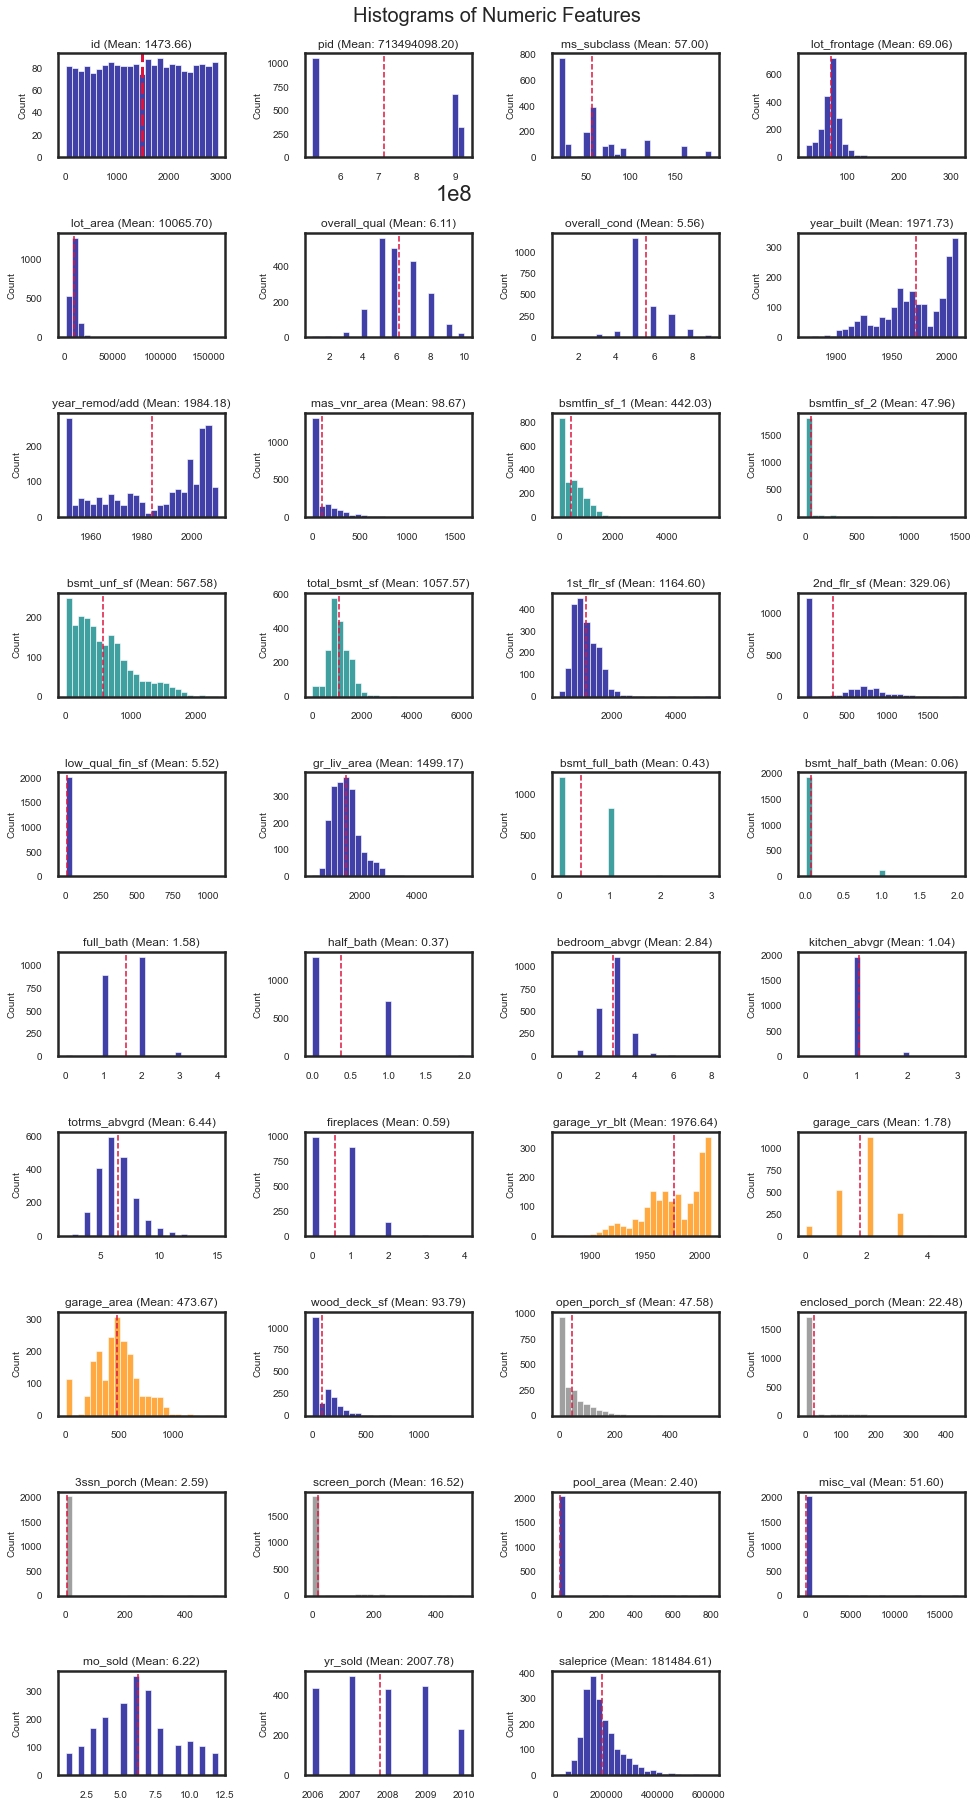

In [48]:
# Display plot
plot_histograms(train, num_features, num_features, sharex=False, sharey=False, kde=False)

# Save plot
plt.savefig('../plots/histograms.png', dpi=150, bbox_inches='tight')

Based on the distributions of the features, we observed that there are several features that are right-skewed; most notably for 'gr_liv_area', 'saleprice'. There are also some features with little variance such as 'pool_area, and '3ssn_porch' due to  lack of these features in most homes. 


### 3.2 Scatter Plots of Numeric Features vs Sale Price

In [49]:
# Create function for plotting scatter plots of numeric features vs 'sale_price'
def plot_scatterplot(dataframe, target, list_of_columns, list_of_titles, sharey=True):    
    ncols = 4
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5), sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, color='darkorange', line_kws={'color': 'blue'})
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel(target, fontsize=10)
        ax[i].tick_params(labelsize=10)
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        
    
    plt.suptitle('Scatterplots of Numeric Features vs Sale Price', fontsize=20, y=1.01)

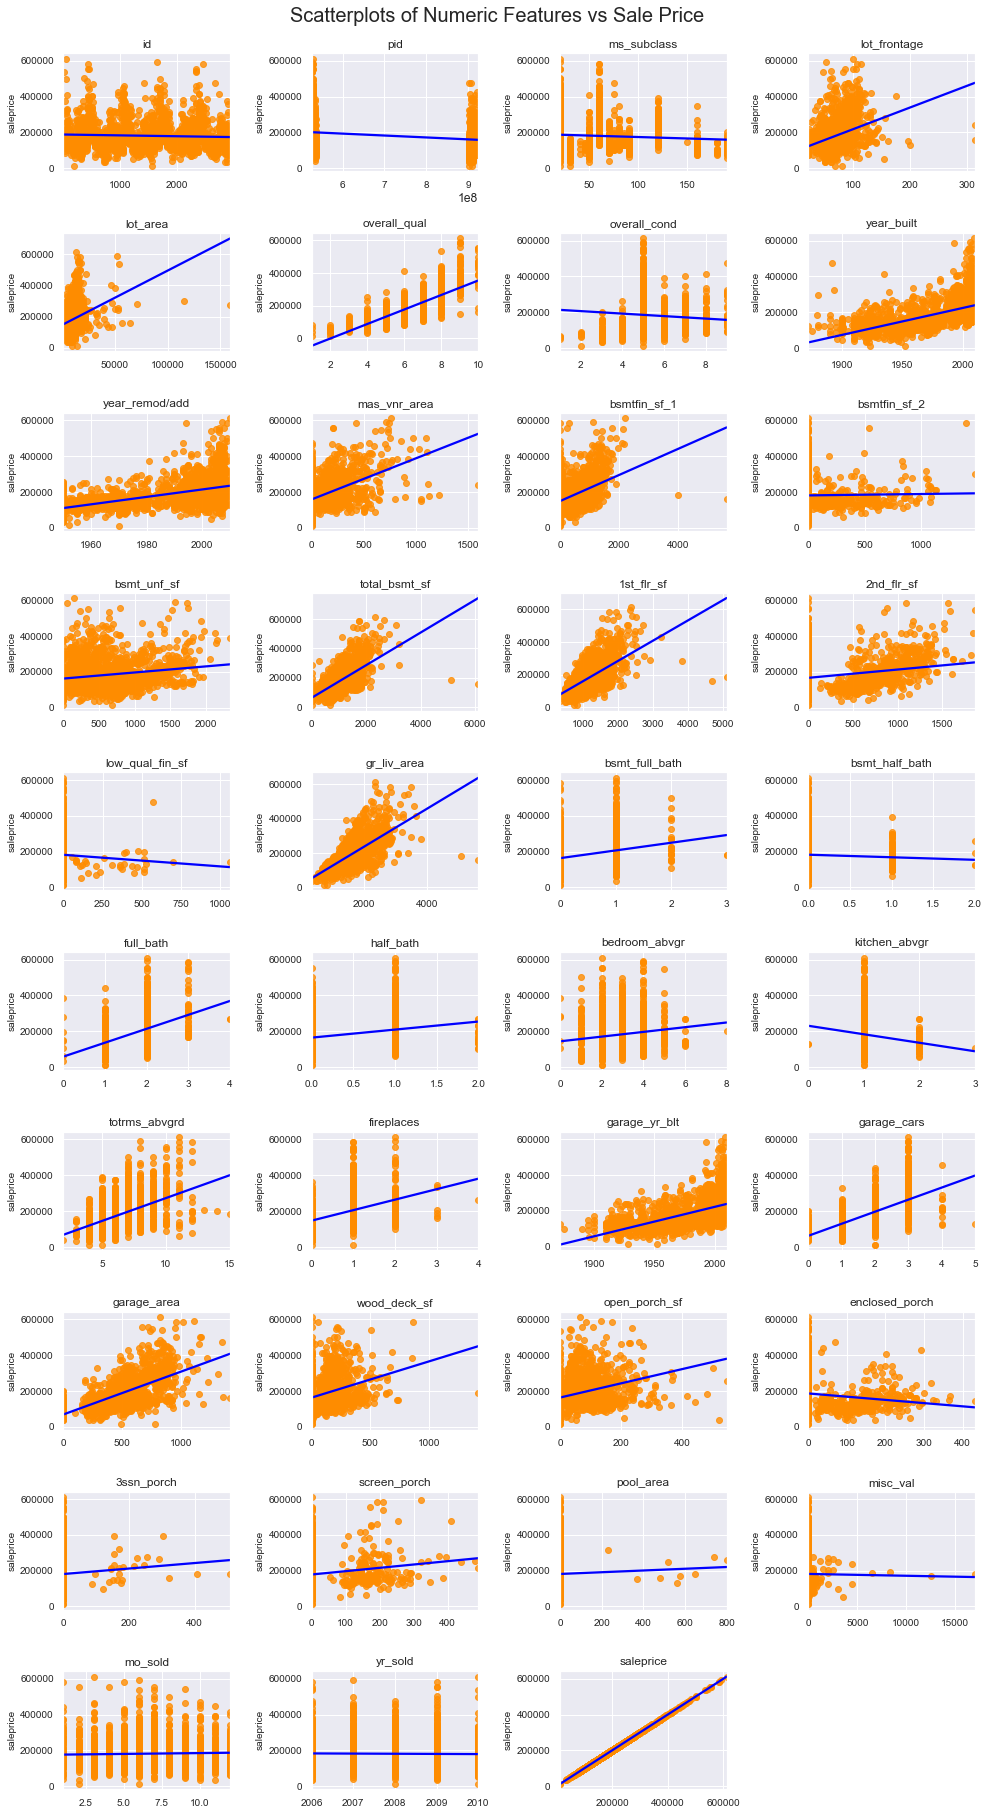

In [50]:
# Display plot
plot_scatterplot(train, 'saleprice', num_features, num_features, sharey=False)

# Save plot
plt.savefig('../plots/scatterplots.png', dpi=150, bbox_inches='tight')

Looking at the relationship between categorical features and sale price, we can see that there is a generally a positive relationship between features relating to quality (e.g 'overall_qual') and sale price. Similarly, houses with a larger area/ size, tend to sell at a higher price, as observed from the positive relationship between features relating to living space (e.g.'gr_liv_area, total_bsmt_sf', '1st_flr_sf') and sale price. Unsurprisingly, newer houses (e.g. year_built) also tend to fetch higher prices.

### 3.3 Box Plots of Categorical Features vs Sale Price

In [51]:
# Create function for plotting box plots of numeric features vs 'sale_price'
def plot_boxplots(dataframe, target, list_of_columns, list_of_titles, sharex=False):    
    ncols = 4
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data=dataframe, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        ax[i].set_xticks([0, 100000, 200000, 300000, 400000, 500000, 600000])
        ax[i].set_xticklabels(['0k','100k','200k','300k','400k','500k','600k'])
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle('Boxplots of Categorical Features vs Sale Price', fontsize=20, y=1.01)

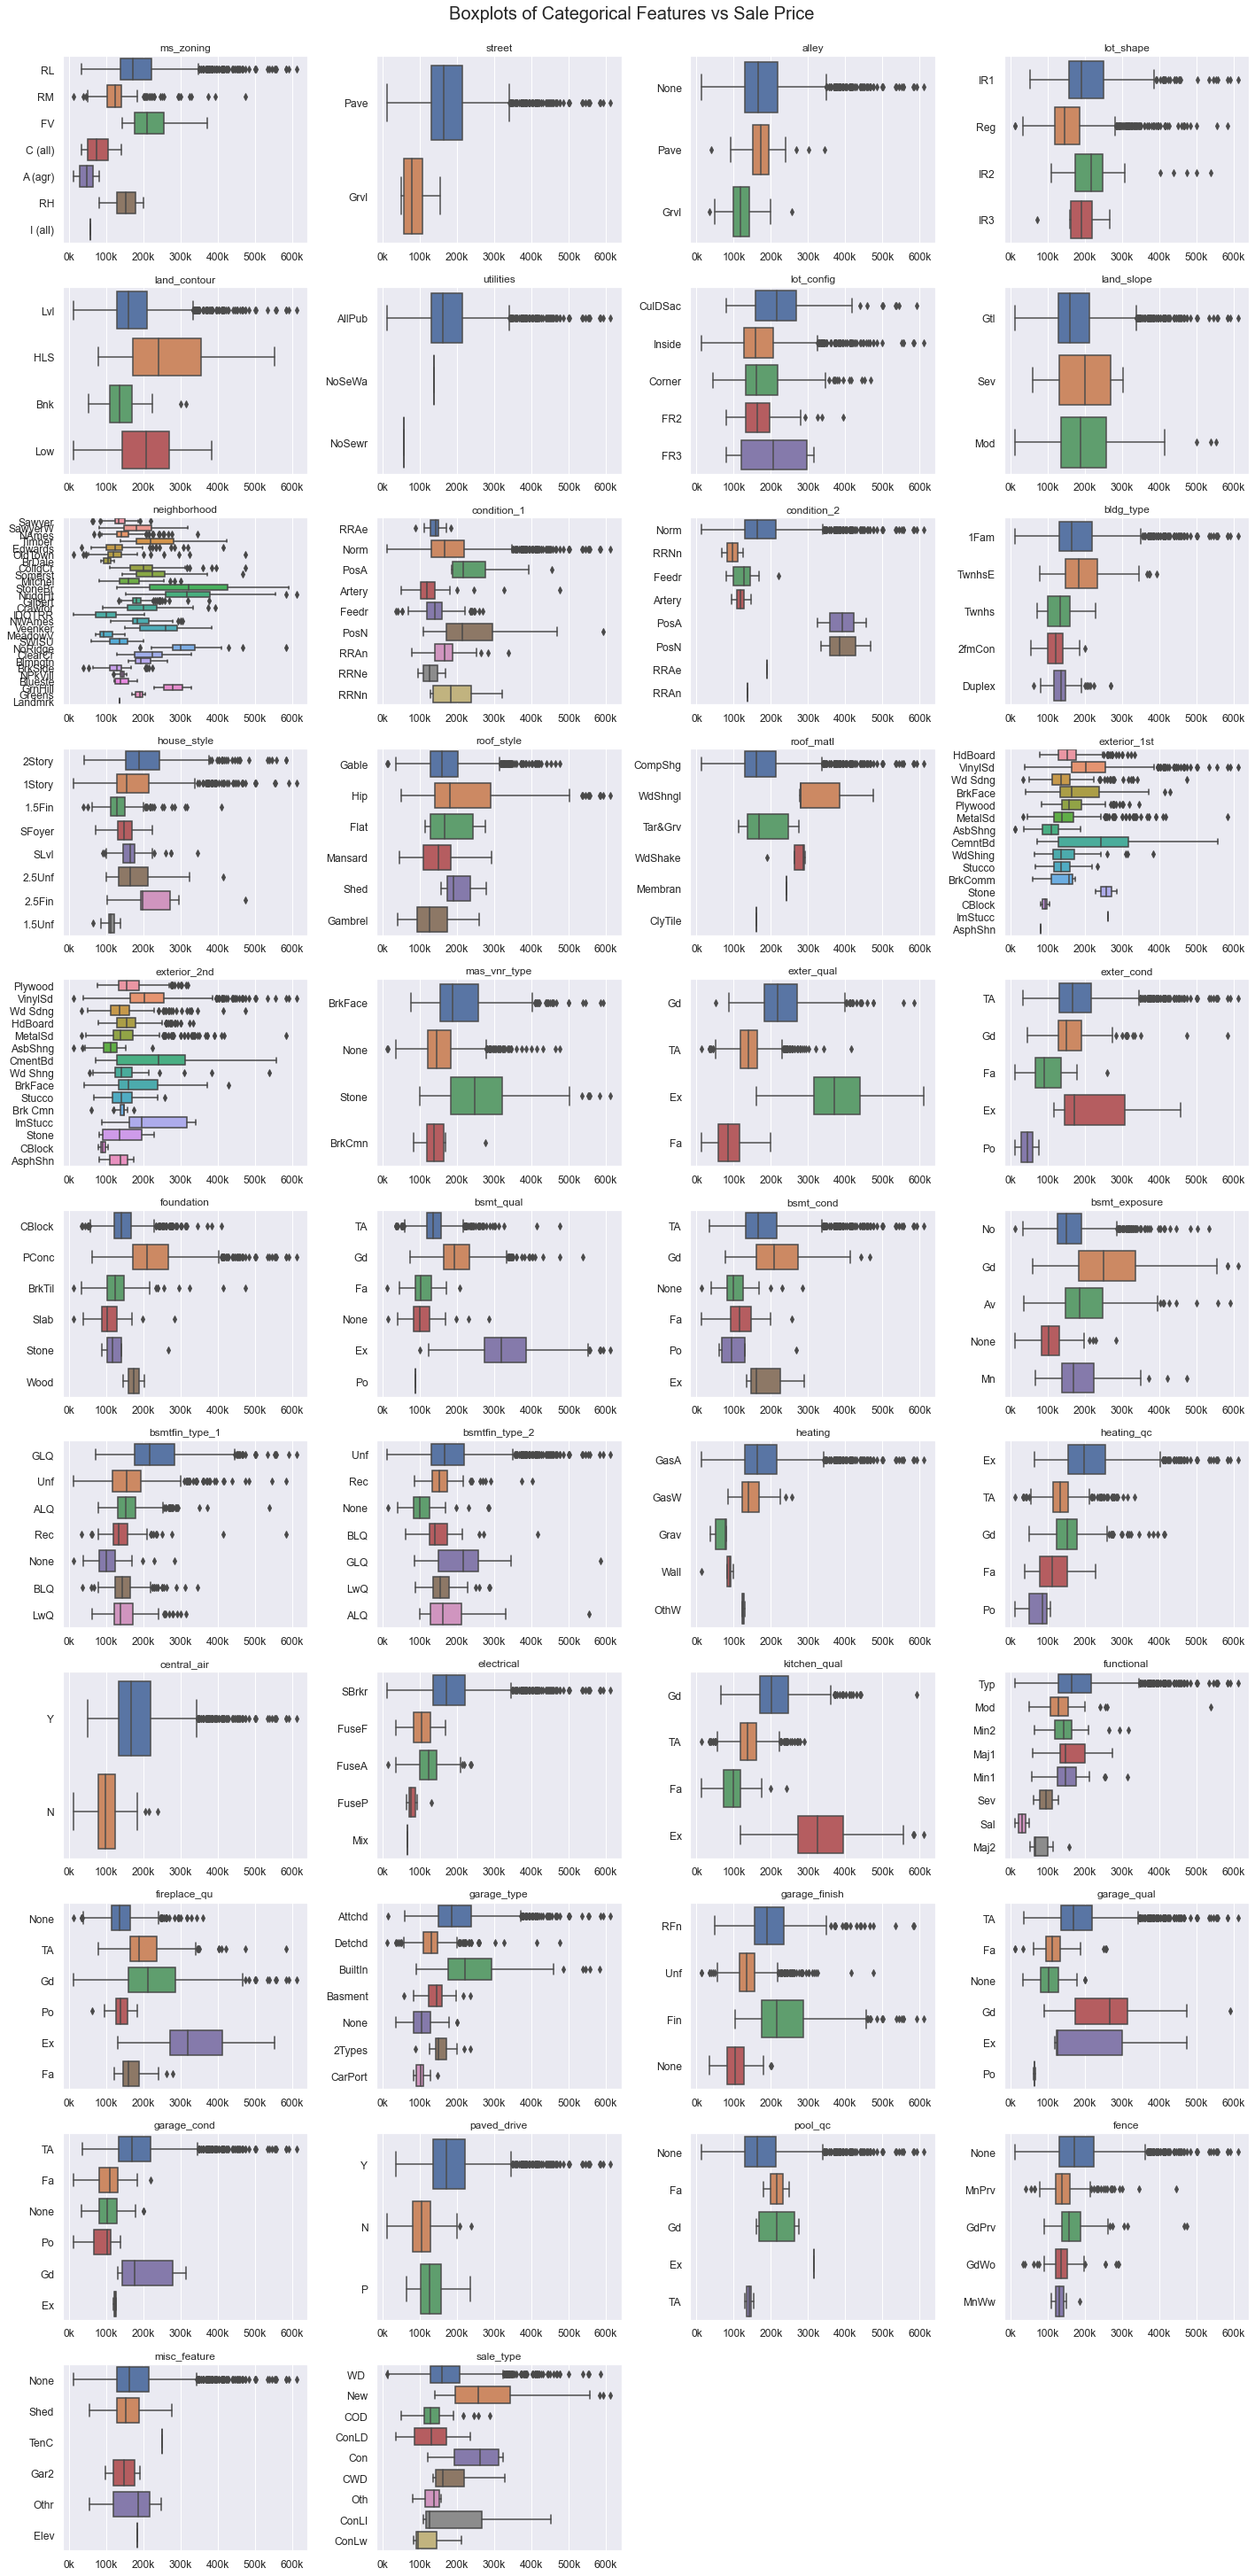

In [52]:
# Display plot
plot_boxplots(train, 'saleprice', cat_features, cat_features, sharex=False)

# Save plot
plt.savefig('../plots/boxplots.png', dpi=150, bbox_inches='tight')

From the boxplots, we observed that some features have a clear relationship with sale price. For example, certain neighborhoods have higher median sale prices than others. The material for the exterior covering of the house also matters. For example, houses with  cement board covering have a higher median sale price, compared to other types of exterior covering. Houses with  utilities such as central aircon also saw higher sale price. Houses with paved driveway and paved alley access to the properties also had higher median sale price.

### 3.4 Strip Plots of Categorical Features vs Sale Price

In [53]:
# Create function for plotting swarm plots of numeric features vs 'sale_price'
def plot_stripplots(dataframe, target, list_of_columns, list_of_titles, sharex=False):    
    ncols = 4
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.stripplot(data=dataframe, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        ax[i].set_xticks([0, 100000, 200000, 300000, 400000, 500000, 600000])
        ax[i].set_xticklabels(['0k','100k','200k','300k','400k','500k','600k'])
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle('Swarmplot of Categorical Features vs Sale Price', fontsize=20, y=1.01)

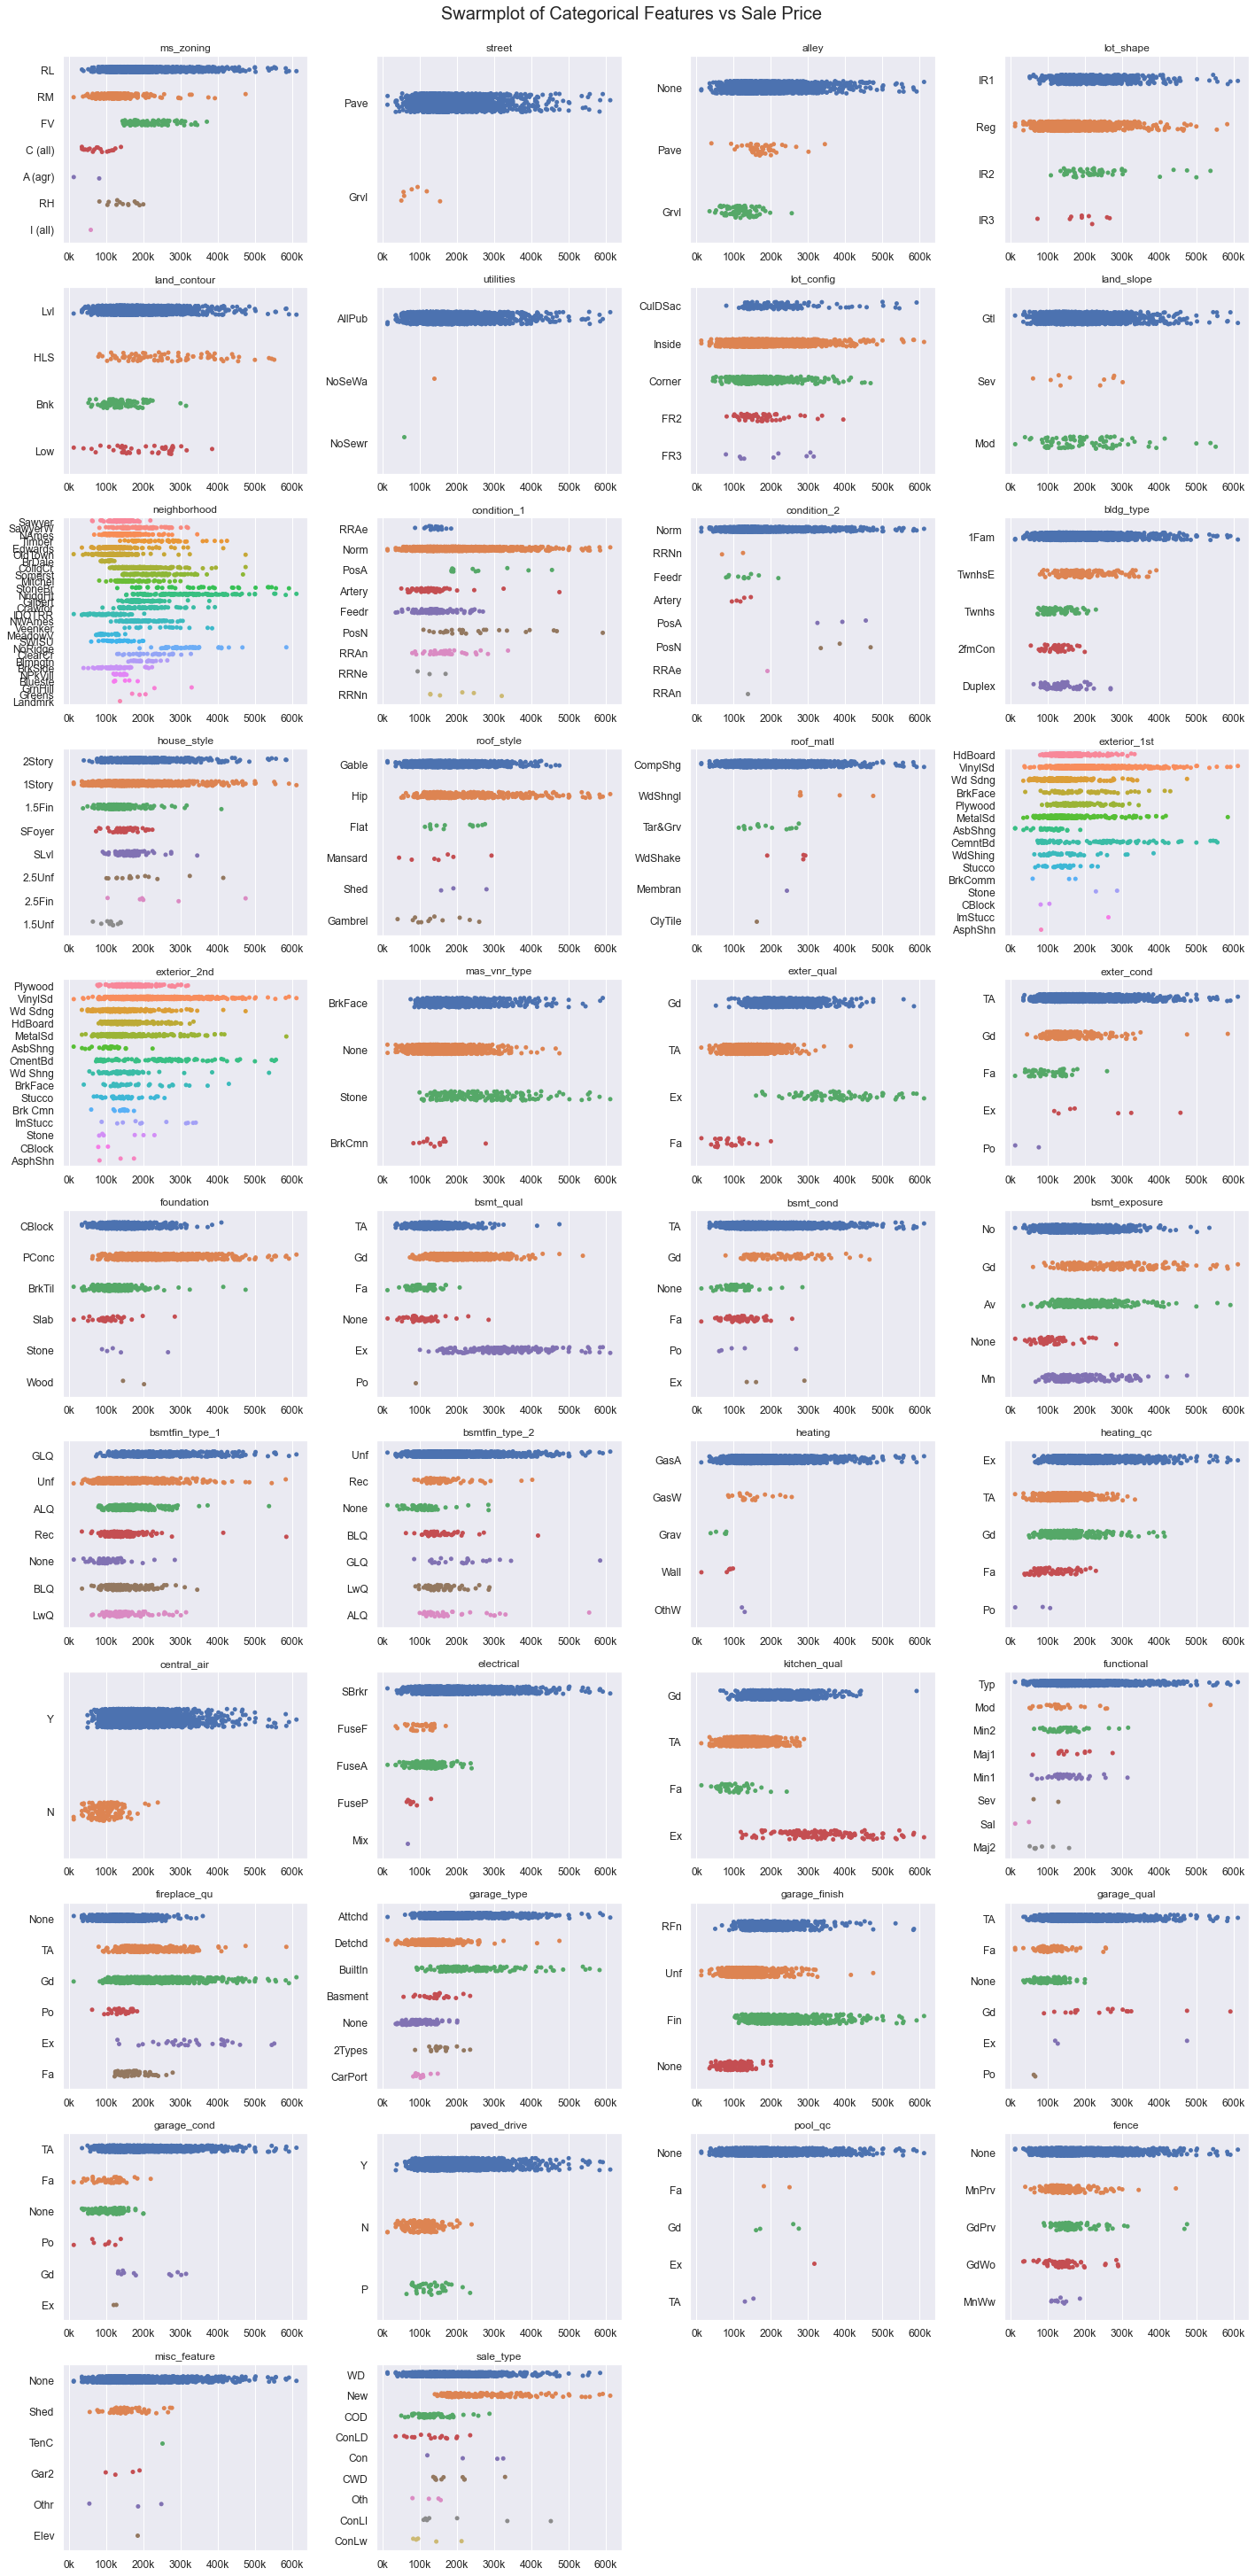

In [54]:
# Display plot
plot_stripplots(train, 'saleprice', cat_features, cat_features, sharex=False)

# Save plot
plt.savefig('../plots/stripplots.png', dpi=150, bbox_inches='tight')

Based on the strip plots, we can quickly notice that there is low variance in certain categories, for example, 'street', 'utilities', 'condition_2', 'roof_matl', 'pool_qc' and 'misc_features'. These are likely poor predictors of sale price.

### 3.5 Correlation Heatmap of Numeric Features

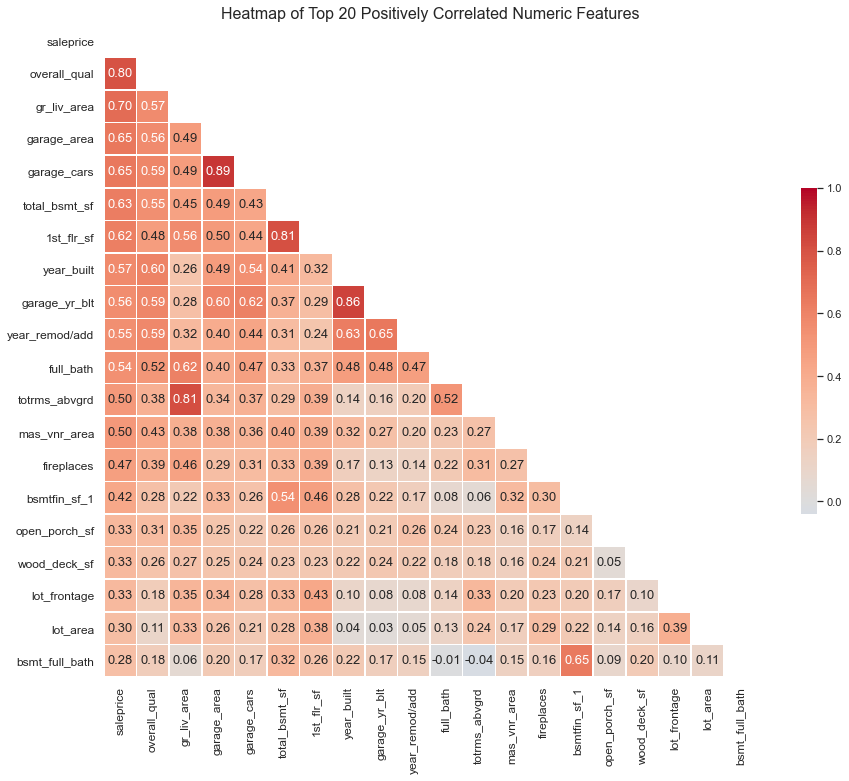

In [55]:
# Set style
sns.set_theme(style='white')

# Correlation matrix for 'train' dataset
train_corr = train.corr()

# Create variable for top k positively correlated features
k = 20 # number of variables for heatmap
top_train_corr_features = train_corr.nlargest(k, 'saleprice')['saleprice'].index

# Compute correlation matrix for top k features
top_train_corr = train[top_train_corr_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(top_train_corr, dtype=bool))

# Set up the matplotlib figure size
plt.figure(figsize=(16,12))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(top_train_corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot =True, fmt='.2f', vmax=1.00, cbar_kws={"shrink": .5}, annot_kws={"size":13})

# Add title and axis labels
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot
plt.savefig('../plots/heatmap.png', dpi=150, bbox_inches='tight')

From the correlation heatmap above, there seems to be multicollinearity where there are high intercorrelations among two or more independent variables. Specifically, several features have a high coefficient magnitude of >0.7 with another. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model. We will try to reduce multicollinearity in the following section.

In [56]:
# Display the top 20 
top_train_corr

saleprice  overall_qual  gr_liv_area  garage_area  \
saleprice        1.000000      0.800208     0.697261     0.650270   
overall_qual     0.800208      1.000000     0.567094     0.563814   
gr_liv_area      0.697261      0.567094     1.000000     0.490949   
garage_area      0.650270      0.563814     0.490949     1.000000   
garage_cars      0.648220      0.587423     0.486600     0.893180   
total_bsmt_sf    0.629273      0.549347     0.454456     0.489079   
1st_flr_sf       0.618451      0.477030     0.562723     0.498712   
year_built       0.571930      0.602822     0.259547     0.487177   
garage_yr_blt    0.556338      0.586677     0.282312     0.597707   
year_remod/add   0.550589      0.585079     0.322254     0.398999   
full_bath        0.538211      0.515524     0.617230     0.398261   
totrms_abvgrd    0.503990      0.381982     0.813524     0.341143   
mas_vnr_area     0.503530      0.429923     0.384126     0.380434   
fireplaces       0.471034      0.388707     0.459142     0.291655   
bsmtfin_sf_1     0.423920      0.279356     0.215687     0.331891   
open_porch_sf    0.333395      0.308668     0.345316     0.247222   
wood_deck_sf     0.326650      0.257380     0.270093     0.245513   
lot_frontage     0.325722      0.182177     0.350749     0.338873   
lot_area         0.296550      0.105784     0.327511     0.263296   
bsmt_full_bath   0.283235      0.175640     0.064603     0.204666   

                garage_cars  total_bsmt_sf  1st_flr_sf  year_built  \
saleprice          0.648220       0.629273    0.618451    0.571930   
overall_qual       0.587423       0.549347    0.477030    0.602822   
gr_liv_area        0.486600       0.454456    0.562723    0.259547   
garage_area        0.893180       0.489079    0.498712    0.487177   
garage_cars        1.000000       0.433451    0.438981    0.542544   
total_bsmt_sf      0.433451       1.000000    0.808331    0.410538   
1st_flr_sf         0.438981       0.808331    1.000000    0.323103   
year_built         0.542544       0.410538    0.323103    1.000000   
garage_yr_blt      0.617469       0.369822    0.290982    0.857316   
year_remod/add     0.441796       0.309999    0.244431    0.630148   
full_bath          0.467490       0.326506    0.367916    0.481151   
totrms_abvgrd      0.368034       0.294747    0.393215    0.137653   
mas_vnr_area       0.356546       0.403547    0.386387    0.320564   
fireplaces         0.310687       0.333529    0.394588    0.168262   
bsmtfin_sf_1       0.261027       0.539333    0.462464    0.276089   
open_porch_sf      0.215364       0.257556    0.258929    0.207395   
wood_deck_sf       0.240721       0.225331    0.226453    0.216989   
lot_frontage       0.280371       0.330670    0.429026    0.103985   
lot_area           0.214954       0.277460    0.381584    0.035908   
bsmt_full_bath     0.173089       0.322168    0.263887    0.215118   

                garage_yr_blt  year_remod/add  full_bath  totrms_abvgrd  \
saleprice            0.556338        0.550589   0.538211       0.503990   
overall_qual         0.586677        0.585079   0.515524       0.381982   
gr_liv_area          0.282312        0.322254   0.617230       0.813524   
garage_area          0.597707        0.398999   0.398261       0.341143   
garage_cars          0.617469        0.441796   0.467490       0.368034   
total_bsmt_sf        0.369822        0.309999   0.326506       0.294747   
1st_flr_sf           0.290982        0.244431   0.367916       0.393215   
year_built           0.857316        0.630148   0.481151       0.137653   
garage_yr_blt        1.000000        0.651462   0.476788       0.158473   
year_remod/add       0.651462        1.000000   0.471416       0.202521   
full_bath            0.476788        0.471416   1.000000       0.519820   
totrms_abvgrd        0.158473        0.202521   0.519820       1.000000   
mas_vnr_area         0.274026        0.204470   0.232739       0.271606   
fireplaces           0.129278        0.139222

## 4.Preprocessing & Feature Engineering

### 4.1 Creating and Dropping Features

In [57]:
# Add new 'property_age'
train['property_age'] = train['yr_sold'] - train['year_built']

In [58]:
# Drop 'yr_sold' and 'year_built'
train.drop(['yr_sold', 'year_built'], axis=1, inplace =True)

In [59]:
# Dropping features that are not useful in predicting sale price
train.drop(['id', 'pid', 'misc_feature', 'misc_val'], axis=1, inplace = True)

In [60]:
# Check if the columns are in order
train.head(2)

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0           60        RL            69     13517   Pave  None       IR1   
1           60        RL            43     11492   Pave  None       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm      1Fam      2Story             6             8   
1        Norm      1Fam      2Story             7             5   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   

  kitchen_qual  totrms_abvgrd functional  fireplaces fireplace_qu garage_type  \
0           Gd              6        Typ           0         None      Attchd   
1           Gd              8        Typ           1           TA      Attchd   

   garage_yr_blt garage_finish  garage_cars  garage_area garage_qual  \
0           1976           RFn          2.0        475.0          TA   
1           1997           RFn          2.0        559.0          TA   

  garage_cond paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  \
0          TA           Y             0             44               0   
1          TA           Y             0             74               0   

   3ssn_porch  screen_porch  pool_area pool_qc fence  mo_sold sale_type  \
0           0             0          0    None  None        3       WD    
1           0             0          0    None  None        4       WD    

   saleprice  property_age  
0     130500            34  
1     220000            13

### 4.2 Encoding of Ordinal (Categorical) Features

In [61]:
# For ref 
ord_features = ['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond','exter_qual', 'exter_cond', 
                'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2','heating_qc', 'electrical', 
                'kitchenqual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond','paved_drive',
                'pool_qc', 'fence'] 

In [62]:
# Apply label-encoding to ordinal features except for 'overall_qual', 'overall_cond' since they have been labelled. 
train['lot_shape'] = train['lot_shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
train['utilities'] = train['utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
train['land_slope'] = train['land_slope'].map({'Gtl':3,'Mod':2,'Sev':1})
train['exter_qual'] = train['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['exter_cond'] = train['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['bsmt_qual'] = train['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['bsmt_cond'] = train['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['bsmt_exposure'] = train['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
train['heating_qc'] = train['heating_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['electrical'] = train['electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0})
train['kitchen_qual'] = train['kitchen_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['functional'] = train['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
train['fireplace_qu'] = train['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['garage_finish'] = train['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
train['garage_qual'] = train['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['garage_cond'] = train['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['paved_drive'] = train['paved_drive'].map({'Y':3,'P':2,'N':1})
train['pool_qc'] = train['pool_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})
train['fence'] = train['fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})

### 4.3 Encoding of Nominal (Categorical) Features

In [63]:
# For ref
nom_features = ['pid', 'ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 
                'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
                'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 
                'sale_type']

The 'ms_subclass' column should be treated as a categorical feature instead of a numeric feature because different type of dwelling could have varying impact on sale price.

In [64]:
# Apply one hot encoding to 'ms_subclass'
train = pd.get_dummies(train, columns=['ms_subclass'])

One hot encoding is performed for the other nominal features.

In [65]:
# Apply one hot encoding to nominal features except for 'pid' and 'misc_feature'
train = pd.get_dummies(train, columns=['ms_zoning']).drop('ms_zoning_A (agr)', axis=1)
train = pd.get_dummies(train, columns=['street']).drop('street_Grvl', axis=1)
train = pd.get_dummies(train, columns=['alley']).drop('alley_None', axis=1)
train = pd.get_dummies(train, columns=['land_contour']).drop('land_contour_Low', axis=1)
train = pd.get_dummies(train, columns=['lot_config']).drop('lot_config_FR3', axis=1)
train = pd.get_dummies(train, columns=['neighborhood']).drop('neighborhood_Landmrk', axis=1)
train = pd.get_dummies(train, columns=['condition_1']).drop('condition_1_RRNe', axis=1)
train = pd.get_dummies(train, columns=['condition_2']).drop('condition_2_RRAn', axis=1)
train = pd.get_dummies(train, columns=['bldg_type']).drop('bldg_type_2fmCon', axis=1)
train = pd.get_dummies(train, columns=['house_style']).drop('house_style_1.5Unf', axis=1)
train = pd.get_dummies(train, columns=['roof_style']).drop('roof_style_Shed', axis=1)
train = pd.get_dummies(train, columns=['roof_matl']).drop('roof_matl_ClyTile', axis=1)
train = pd.get_dummies(train, columns=['exterior_1st']).drop('exterior_1st_AsbShng', axis=1)
train = pd.get_dummies(train, columns=['exterior_2nd']).drop('exterior_2nd_CBlock', axis=1)
train = pd.get_dummies(train, columns=['mas_vnr_type']).drop('mas_vnr_type_None', axis=1)
train = pd.get_dummies(train, columns=['foundation']).drop('foundation_Wood', axis=1)
train = pd.get_dummies(train, columns=['heating']).drop('heating_OthW', axis=1)
train = pd.get_dummies(train, columns=['central_air']).drop('central_air_N', axis=1)
train = pd.get_dummies(train, columns=['garage_type']).drop('garage_type_None', axis=1)
train = pd.get_dummies(train, columns=['sale_type']).drop('sale_type_Oth', axis=1)

In [66]:
# Check 'train' dataset shape
train.shape

(2050, 205)

After cleaning and pre-processing, the 'train' dataset has been tranformed into 2050 rows and 205 features.

In [67]:
# Save cleaned 'train' data
train.to_csv('../datasets/train_clean.csv', index=False)

### 4.4 Correlation Heatmap of Numeric Features After Initial Pre-processing

We will plot a heatmap again but with the new transformed data to check the collinearity between the features. 

In [68]:
# Load cleaned dataset
train_clean = pd.read_csv('../datasets/train_clean.csv')

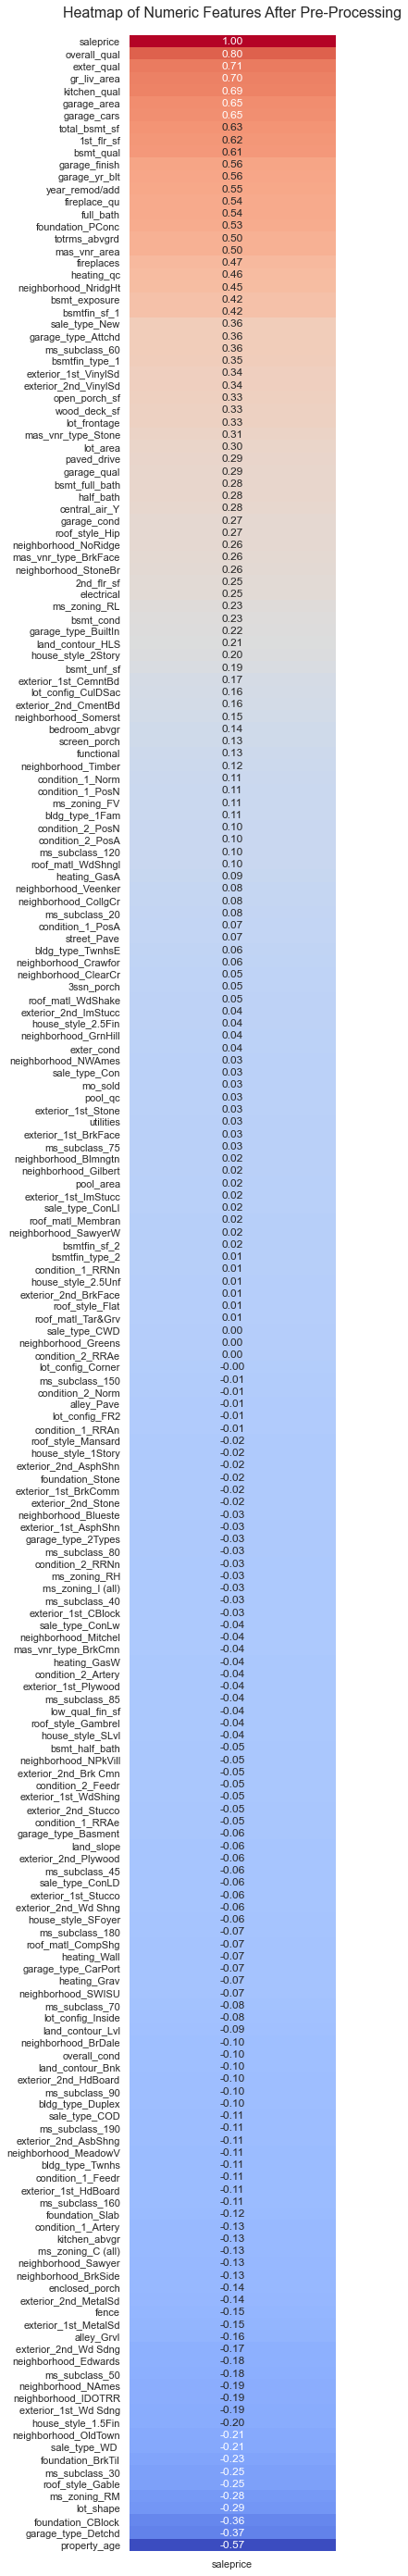

In [69]:
# Correlation matrix for 'train_clean' dataset
train_clean_corr = train_clean.corr()

# Check correlation of features with sale price
plt.figure(figsize=(4,50))

sns.heatmap(train_clean_corr[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='coolwarm', annot=True, fmt='.2f',cbar=False)
plt.title('Heatmap of Numeric Features After Pre-Processing', fontsize=16, y=1.005)

# Save plot
plt.savefig('../plots/heatmap_all_after_preprocessing.png', dpi=150, bbox_inches='tight')

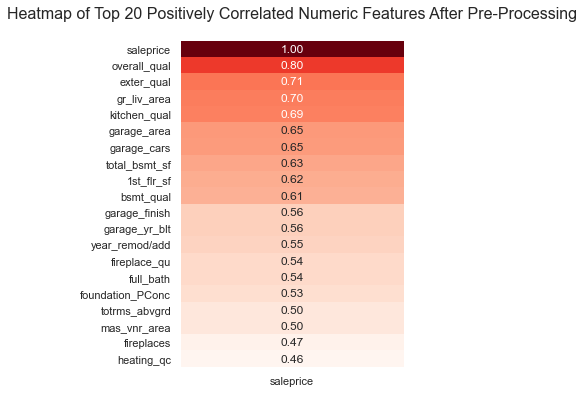

In [70]:
# Check features with strong positive correlation with sale price
plt.figure(figsize=(4,6))

sns.heatmap(train_clean_corr[['saleprice']].sort_values(by='saleprice', ascending=False).head(20), cmap='Reds', annot=True, fmt='.2f', cbar=False)
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features After Pre-Processing', fontsize=16, y=1.05)

# Save plot
plt.savefig('../plots/heatmap_top20positive.png', dpi=150, bbox_inches='tight')


Based on the **top 20 positively correlated numeric features after pre-processing**, features relating to a property's quality and size/area  have a very high correlation with sale price. 

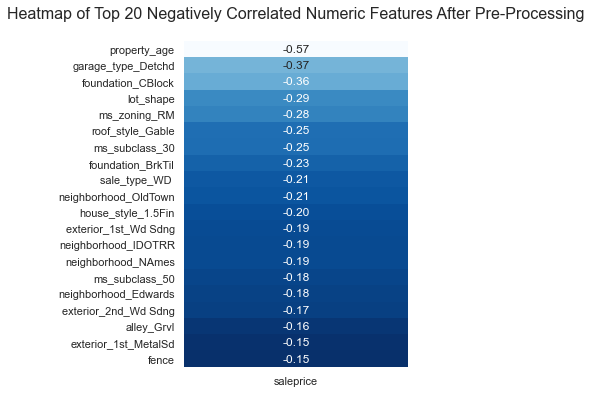

In [71]:
# Check features with strong negative correlation with sale price
plt.figure(figsize=(4,6))
sns.heatmap(train_clean_corr[['saleprice']].sort_values(by='saleprice').head(20), cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.title('Heatmap of Top 20 Negatively Correlated Numeric Features After Pre-Processing', fontsize=16, y=1.05)

# Save plot
plt.savefig('../plots/heatmap_top20negative.png', dpi=150, bbox_inches='tight')

Based on the **top 20 negatively correlated numeric features after pre-processing**, features relating to property's age, location, style and exterior covering on house have a negative correlation with sale price.  

Unsurprisingly, older houses (as indicated by 'property_age' and 'ms_subclass_30'= 1-STORY 1945 & OLDER) also have lower sale price. 

Residential areas with medium density (as indicated by 'ms_zoning_RM' = Residential Medium Density) and neighbourhoods such as Old Town, Iowa DOT and Rail Road, North Ames, Edwards (as indicated by 'neighbourhood') have lower sale price.

Houses with detached garages also have negative correlation with sale price. This could be because convenience is important to prospective home buyers. 

In addition, 1.5 storey houses ('ms_subclass_50 = 1-1/2 STORY FINISHED ALL AGES | 'house_style_1.5Fin' = One and one-half story: 2nd level finished) also have lower sale price. This could be because such houses have lesser privacy since the master bedroom is on the main level.

### 4.5 High Pairwise Correlation

Pairwise correlation allows us to detect highly correlated features which bring no new information to the dataset. Since these features only add to model complexity, increase the chance of overfitting, and require more computations, the feature that has a lower correlation coefficient with the target should be dropped.

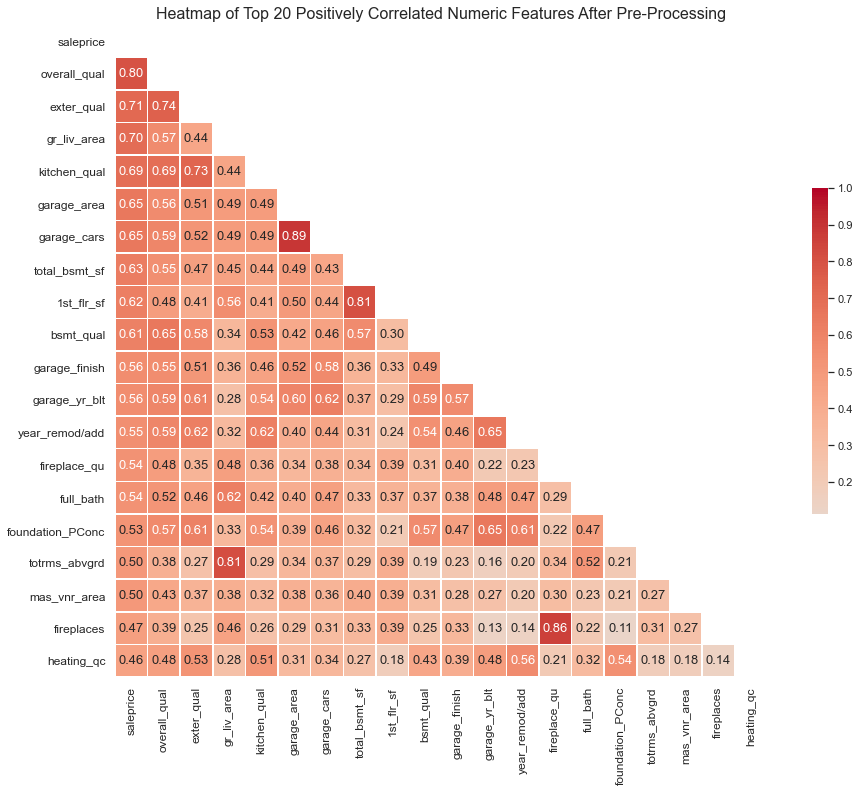

In [72]:
# Set style
sns.set_theme(style='white')

# Correlation matrix for 'train' dataset
train_clean_corr = train_clean.corr()

# Create variable for top k positively correlated features
k = 20 # number of variables for heatmap
top_train_corr_features = train_clean_corr.nlargest(k, 'saleprice')['saleprice'].index

# Compute correlation matrix for top k features
top_train_corr = train[top_train_corr_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(top_train_corr, dtype=bool))

# Set up the matplotlib figure size
plt.figure(figsize=(16,12))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(top_train_corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot =True, fmt='.2f', vmax=1.00, cbar_kws={"shrink": .5}, annot_kws={"size":13})

# Add title and axis labels
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features After Pre-Processing', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot
plt.savefig('../plots/heatmap_after_preprocessing.png', dpi=150, bbox_inches='tight')

In [73]:
# Display full correlation matrix
train_clean_corr

lot_frontage  lot_area  lot_shape  utilities  \
lot_frontage              1.000000  0.389371  -0.110036  -0.018478   
lot_area                  0.389371  1.000000  -0.301751  -0.029800   
lot_shape                -0.110036 -0.301751   1.000000   0.013726   
utilities                -0.018478 -0.029800   0.013726   1.000000   
land_slope               -0.054843 -0.303643   0.106917  -0.006394   
overall_qual              0.182177  0.105784  -0.249153   0.030060   
overall_cond             -0.049617 -0.019157   0.077082   0.006136   
year_remod/add            0.080082  0.050829  -0.221636   0.040661   
mas_vnr_area              0.198283  0.167493  -0.127664  -0.044557   
exter_qual                0.139161  0.089180  -0.237514   0.037299   
exter_cond               -0.023575  0.019601   0.005019   0.033335   
bsmt_qual                 0.090121  0.060805  -0.232105   0.048986   
bsmt_cond                -0.001999 -0.010891  -0.083762   0.048160   
bsmt_exposure             0.171790  0.194823  -0.181383   0.026438   
bsmtfin_type_1            0.039840  0.042584  -0.154590  -0.006083   
bsmtfin_sf_1              0.197803  0.215669  -0.182375   0.023657   
bsmtfin_type_2            0.000451  0.020641  -0.028412  -0.022646   
bsmtfin_sf_2              0.032420  0.041779  -0.033933  -0.033793   
bsmt_unf_sf               0.117288  0.041506  -0.011256   0.022090   
total_bsmt_sf             0.330670  0.277460  -0.210532   0.033709   
heating_qc                0.081435  0.022168  -0.160791   0.015112   
electrical                0.055649  0.043071  -0.117753   0.065214   
1st_flr_sf                0.429026  0.381584  -0.221628  -0.000105   
2nd_flr_sf                0.012824  0.029505  -0.070693   0.022926   
low_qual_fin_sf          -0.000317  0.001265   0.015285   0.003202   
gr_liv_area               0.350749  0.327511  -0.234126   0.019738   
bsmt_full_bath            0.099804  0.113243  -0.086947   0.024244   
bsmt_half_bath           -0.028965  0.029140  -0.045968  -0.071082   
full_bath                 0.139189  0.125676  -0.198524   0.031149   
half_bath                 0.032028  0.049948  -0.136245   0.021967   
bedroom_abvgr             0.200701  0.139076  -0.023763   0.018293   
kitchen_abvgr             0.014638 -0.013499   0.092716   0.006066   
kitchen_qual              0.166544  0.119407  -0.202318  -0.006664   
totrms_abvgrd             0.332516  0.238710  -0.133285   0.008286   
functional               -0.019069 -0.086345  -0.024212   0.007646   
fireplaces                0.225397  0.289461  -0.199487  -0.003504   
fireplace_qu              0.214915  0.201408  -0.191296  -0.014805   
garage_yr_blt             0.082981  0.032209  -0.252053   0.014461   
garage_finish             0.195411  0.124449  -0.275069   0.001889   
garage_cars               0.280371  0.214954  -0.228951   0.004263   
garage_area               0.338873  0.263296  -0.215650   0.004166   
garage_qual               0.097905  0.101190  -0.142804  -0.008070   
garage_cond               0.094257  0.091790  -0.130485  -0.007824   
paved_drive               0.037123 -0.001734  -0.151205   0.027735   
wood_deck_sf              0.101601  0.155684  -0.149762   0.012484   
open_porch_sf             0.170041  0.140830  -0.084069  -0.017362   
enclosed_porch           -0.001639  0.014404   0.090065   0.011163   
3ssn_porch                0.028540  0.019545  -0.028046   0.003046   
screen_porch              0.067911  0.067695  -0.069081  -0.071726   
pool_area                 0.141306  0.115098  -0.039573   0.001882   
pool_qc                   0.150762  0.127955  -0.055088   0.001833   
fence                     0.016691 -0.031812   0.038971   0.013668   
mo_sold                  -0.016527  0.003113  -0.005463   0.049211   
saleprice                 0.325722  0.296550  -0.294455   0.026411   
property_age             -0.103515 -0.037149   0.278695  -0.030395   
ms_subclass_20            0.240690  0.173613  -0.042001  -0.017817   
ms_subclass_30           -0.0780

In [74]:
# Create a function to select highly correlated features to consider elimination 
def correlation(dataframe, threshold) :
    col_corr = set()   # set of all the names of the correlated columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range (i) :
            if (corr_matrix.iloc[i, j]) > threshold :    
                colname = corr_matrix.columns[i]    # get the name of the column
                col_corr.add(colname)
    return col_corr

# source: https://www.youtube.com/watch?v=FndwYNcVe0U

In [75]:
# Display number of highly correlated features
corr_features = correlation(train_clean, 0.7)
len(set(corr_features))

28

In [76]:
# Display highly correlated features 
corr_features

{'1st_flr_sf',
 'bldg_type_Duplex',
 'bldg_type_TwnhsE',
 'bsmtfin_sf_2',
 'exter_qual',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'fireplace_qu',
 'garage_area',
 'garage_cond',
 'house_style_1.5Fin',
 'house_style_1Story',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'kitchen_qual',
 'ms_subclass_90',
 'neighborhood_Somerst',
 'pool_qc',
 'roof_matl_Tar&Grv',
 'saleprice',
 'totrms_abvgrd'}

In [77]:
# Dropping features with high pairwise correlation (all above except for 'salepice' and 'exter_qual')
train_clean = train_clean.drop(['1st_flr_sf',
 'bldg_type_Duplex',
 'bldg_type_TwnhsE',
 'bsmtfin_sf_2',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'fireplace_qu',
 'garage_area',
 'garage_cond',
 'house_style_1.5Fin',
 'house_style_1Story',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'kitchen_qual',
 'ms_subclass_90',
 'neighborhood_Somerst',
 'pool_qc',
 'roof_matl_Tar&Grv',
 'totrms_abvgrd'], axis=1)

### 4.6 Low Variance Features

From the EDA earlier, we noted that several features have low variance. Features without much variance or variability in the data will provide little information to an model for learning the patterns. Hence, we will seek to remove such features.

In [78]:
# Filter for features with low variance
var_list = train_clean.var()
low_var_list = var_list[var_list.values<0.01]   #threshold of 0.01 is used

In [79]:
low_var_list.sort_values()

ms_zoning_I (all)       0.000488
exterior_1st_ImStucc    0.000488
condition_2_RRAe        0.000488
roof_matl_Membran       0.000488
exterior_1st_AsphShn    0.000488
ms_subclass_150         0.000488
condition_2_RRNn        0.000975
neighborhood_GrnHill    0.000975
exterior_1st_CBlock     0.000975
exterior_1st_Stone      0.000975
exterior_1st_BrkComm    0.001462
condition_2_PosA        0.001462
condition_2_PosN        0.001462
exterior_2nd_AsphShn    0.001462
neighborhood_Greens     0.001462
sale_type_Con           0.001948
roof_matl_WdShake       0.001948
ms_subclass_40          0.001948
roof_matl_WdShngl       0.002434
heating_Grav            0.002434
condition_2_Artery      0.002434
foundation_Stone        0.002434
sale_type_ConLw         0.002434
utilities               0.002438
heating_Wall            0.002920
neighborhood_Blueste    0.002920
condition_1_RRNn        0.002920
house_style_2.5Fin      0.002920
exterior_2nd_Stone      0.002920
street_Pave             0.003405
roof_style

In [80]:
# Display features with low variance
low_var_drop_list = [item for item in low_var_list.index]
low_var_drop_list

['utilities',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_75',
 'ms_subclass_150',
 'ms_subclass_180',
 'ms_zoning_C (all)',
 'ms_zoning_I (all)',
 'ms_zoning_RH',
 'street_Pave',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_NPkVill',
 'neighborhood_Veenker',
 'condition_1_PosA',
 'condition_1_RRNn',
 'condition_2_Artery',
 'condition_2_Feedr',
 'condition_2_PosA',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRNn',
 'house_style_2.5Fin',
 'roof_style_Flat',
 'roof_style_Gambrel',
 'roof_style_Mansard',
 'roof_matl_Membran',
 'roof_matl_WdShake',
 'roof_matl_WdShngl',
 'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_AsphShn',
 'exterior_2nd_ImStucc',
 'exterior_2nd_Stone',
 'mas_vnr_type_BrkCmn',
 'foundation_Stone',
 'heating_GasW',
 'heating_Grav',
 'heating_Wall',
 'garage_type_2Types',
 'garage_type_CarPort',


In [81]:
# Dropping features with low variance
train_clean = train_clean.drop(low_var_drop_list, axis=1)

In [82]:
# Check 'train_clean' dataset shape after feature engineering
train_clean.shape

(2050, 128)

In [83]:
# Save final 'train' data
train_clean.to_csv('../datasets/train_final.csv', index=False)

### 4.7 Pre-processing of Test Dataset

We replicated all the above cleaning, pre-processing and feature engineering steps to our test dataset for the purpose of deploying our model to the unseen 'test' data and submission to Kaggle.

In [84]:
# Display first 2 rows of 'test' dataset
test.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   

   Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
0              2           Fa              9        Typ           0   
1              2           TA             10        Typ           0   

  Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
0          NaN      Detchd         1910.0           Unf            1   
1          NaN      Attchd         1977.0           Fin            2   

   Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
0          440          Po          Po           Y             0   
1          580          TA          TA           Y           170   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  \
0             60             112           0             0          0     NaN   
1              0               0           0             0          0     NaN   

  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  
0   NaN          NaN         0        4     2006       WD   
1   NaN          NaN         0        8     2006       WD

In [85]:
# Display shape of 'test' dataset
np.shape(test)

(878, 80)

In [86]:
# Describe 'test' dataset
test.describe().transpose()

count          mean           std          min           25%  \
Id               878.0  1.444749e+03  8.508383e+02          2.0  6.922500e+02   
PID              878.0  7.162867e+08  1.889103e+08  526302110.0  5.284841e+08   
MS SubClass      878.0  5.826879e+01  4.223541e+01         20.0  2.000000e+01   
Lot Frontage     718.0  6.954596e+01  2.353394e+01         21.0  5.900000e+01   
Lot Area         878.0  1.030703e+04  1.000267e+04       1477.0  7.297250e+03   
Overall Qual     878.0  6.050114e+00  1.369065e+00          2.0  5.000000e+00   
Overall Cond     878.0  5.566059e+00  1.128903e+00          1.0  5.000000e+00   
Year Built       878.0  1.970492e+03  3.039589e+01       1880.0  1.954000e+03   
Year Remod/Add   878.0  1.984418e+03  2.045072e+01       1950.0  1.967000e+03   
Mas Vnr Area     877.0  1.062360e+02  1.871589e+02          0.0  0.000000e+00   
BsmtFin SF 1     878.0  4.413280e+02  4.384573e+02          0.0  0.000000e+00   
BsmtFin SF 2     878.0  5.389636e+01  1.786324e+02          0.0  0.000000e+00   
Bsmt Unf SF      878.0  5.391333e+02  4.261722e+02          0.0  2.160000e+02   
Total Bsmt SF    878.0  1.034358e+03  4.134463e+02          0.0  7.890000e+02   
1st Flr SF       878.0  1.145787e+03  3.752641e+02        407.0  8.640000e+02   
2nd Flr SF       878.0  3.483986e+02  4.329856e+02          0.0  0.000000e+00   
Low Qual Fin SF  878.0  2.728929e+00  3.257255e+01          0.0  0.000000e+00   
Gr Liv Area      878.0  1.496915e+03  5.064690e+02        407.0  1.114000e+03   
Bsmt Full Bath   878.0  4.396355e-01  5.299477e-01          0.0  0.000000e+00   
Bsmt Half Bath   878.0  5.580866e-02  2.296827e-01          0.0  0.000000e+00   
Full Bath        878.0  1.539863e+00  5.590601e-01          0.0  1.000000e+00   
Half Bath        878.0  3.986333e-01  5.059265e-01          0.0  0.000000e+00   
Bedroom AbvGr    878.0  2.879271e+00  8.307123e-01          0.0  2.000000e+00   
Kitchen AbvGr    878.0  1.047836e+00  2.239657e-01          0.0  1.000000e+00   
TotRms AbvGrd    878.0  6.454442e+00  1.596632e+00          3.0  5.000000e+00   
Fireplaces       878.0  6.184510e-01  6.695708e-01          0.0  0.000000e+00   
Garage Yr Blt    833.0  1.976760e+03  2.568976e+01       1900.0  1.960000e+03   
Garage Cars      878.0  1.742597e+00  7.503909e-01          0.0  1.000000e+00   
Garage Area      878.0  4.703622e+02  2.127341e+02          0.0  3.225000e+02   
Wood Deck SF     878.0  9.343052e+01  1.211817e+02          0.0  0.000000e+00   
Open Porch SF    878.0  4.707062e+01  6.818094e+01          0.0  0.000000e+00   
Enclosed Porch   878.0  2.406492e+01  7.324946e+01          0.0  0.000000e+00   
3Ssn Porch       878.0  2.597950e+00  2.496248e+01          0.0  0.000000e+00   
Screen Porch     878.0  1.483030e+01  5.300379e+01          0.0  0.000000e+00   
Pool Area        878.0  1.884966e+00  2.991667e+01          0.0  0.000000e+00   
Misc Val         878.0  4.849886e+01  5.501693e+02          0.0  0.000000e+00   
Mo Sold          878.0  6.202733e+00  2.642498e+00          1.0  5.000000e+00   
Yr Sold          878.0  2.007826e+03  1.327861e+00       2006.0  2.007000e+03   

                         50%           75%           max  
Id                    1433.0  2.197500e+03  2.928000e+03  
PID              535454155.0  9.071904e+08  1.007100e+09  
MS SubClass             50.0  7.000000e+01  1.900000e+02  
Lot Frontage            68.0  8.000000e+01  1.820000e+02  
Lot Area              9446.0  1.158900e+04  2.152450e+05  
Overall Qual             6.0  7.000000e+00  1.000000e+01  
Overall Cond             5.0  6.000000e+00  9.000000e+00  
Year Built            1972.0  1.999750e+03  2.010000e+03  
Year Remod/Add        1992.0  2.003000e+03  2.010000e+03  
Mas Vnr Area             0.0  1.720000e+02  1.378000e+03  
BsmtFin SF 1           373.0  7.347500e+02  2.288000e+03  
BsmtFin SF 2             0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF            452.0  7.800000e+02  2.046000e+03  
Total Bsmt SF          975.0  1

In [87]:
# Get info for 'test' dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [88]:
# Get columns in 'test' dataset
test_columns = test.columns
test_columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [89]:
# Check for duplicate 'Id' in 'test' dataset
duplicates = test.duplicated(subset=['Id'], keep=False)
test[duplicates]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

In [90]:
# Convert the column names to lower case and drop spaces for 'test' dataset
test.columns = test.columns.str.replace(' ','_')
test.rename(str.lower, axis=1, inplace=True)

In [91]:
# Check for columns with null values in 'test' dataset
null_values = test.isnull().sum()
null_values = null_values[null_values > 0].sort_values(ascending=False)
null_values

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

In [92]:
# Replace NA values with 'None'
test['pool_qc'] = test['pool_qc'].fillna('None')
test['misc_feature'] = test['misc_feature'].fillna('None')
test['alley'] = test['alley'].fillna('None')
test['fence'] = test['fence'].fillna('None')
test['fireplace_qu'] = test['fireplace_qu'].fillna('None')

In [93]:
# Find mean of 'lot_frontage'
test['lot_frontage'].mean()

69.54596100278552

In [94]:
# Replace NA value with mean
test['lot_frontage'] = test['lot_frontage'].fillna(test['lot_frontage'].mean())

In [95]:
# Convert dtype from float to int for 'lot_frontage'
test['lot_frontage'] = test['lot_frontage'].astype('int')

In [96]:
# Replace NA values with 'None'
test['garage_cond'] = test['garage_cond'].fillna('None')
test['garage_qual'] = test['garage_qual'].fillna('None')
test['garage_finish'] = test['garage_finish'].fillna('None')
test['garage_type'] = test['garage_type'].fillna('None')

In [97]:
# Impute 'garage_yr_blt' with values from 'year_built'
test['garage_yr_blt'] = test['garage_yr_blt'].fillna(test['year_built'])

In [98]:
# Replace NA values with 'None'
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].fillna('None')
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].fillna('None')
test['bsmt_qual'] = test['bsmt_qual'].fillna('None')
test['bsmt_cond'] = test['bsmt_cond'].fillna('None')
test['bsmt_exposure'] = test['bsmt_exposure'].fillna('None')

In [99]:
# Replace NA values with '0' for continuous variable 
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [100]:
# Replace NA values with 'None' for nominal variable
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

In [101]:
# For ref
year_col = ['year_built', 'year_remod/add', 'yr_sold', 'garage_yr_blt']

In [102]:
# Check for future-dated values
test[test['year_built'] > 2010] 

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type]
Index: []

In [103]:
# Convert dtype from float to int for 'garage_yr_blt'
test['garage_yr_blt'] = test['garage_yr_blt'].astype('int')

In [104]:
# Add new 'property_age'
test['property_age'] = test['yr_sold'] - test['year_built']

In [105]:
# Drop 'yr_sold' and 'year_built'
test.drop(['yr_sold', 'year_built'], axis=1, inplace =True)

In [106]:
# Dropping features that are not useful in predicting sale price
test.drop(['id', 'pid', 'misc_feature', 'misc_val'], axis=1, inplace = True)

In [107]:
# Apply label-encoding to ordinal features except for 'overall_qual', 'overall_cond' since they have been labelled. 
test['lot_shape'] = test['lot_shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
test['utilities'] = test['utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})
test['land_slope'] = test['land_slope'].map({'Gtl':3,'Mod':2,'Sev':1})
test['exter_qual'] = test['exter_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['exter_cond'] = test['exter_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['bsmt_qual'] = test['bsmt_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['bsmt_cond'] = test['bsmt_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['bsmt_exposure'] = test['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
test['heating_qc'] = test['heating_qc'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['electrical'] = test['electrical'].map({'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0, '0':0})
test['kitchen_qual'] = test['kitchen_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['functional'] = test['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
test['fireplace_qu'] = test['fireplace_qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['garage_finish'] = test['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
test['garage_qual'] = test['garage_qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['garage_cond'] = test['garage_cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['paved_drive'] = test['paved_drive'].map({'Y':3,'P':2,'N':1})
test['pool_qc'] = test['pool_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})
test['fence'] = test['fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':1,'None':0})

In [108]:
# Replace NA values with '0'
test['electrical'] = test['electrical'].fillna(0)

In [109]:
# Apply one hot encoding to 'ms_subclass'
test = pd.get_dummies(test, columns=['ms_subclass'])

In [110]:
# Apply one hot encoding to nominal features except for 'pid' and 'misc_feature'
test = pd.get_dummies(test, columns=['ms_zoning'])     # cannot drop'ms_zoning_A (agr) as it does not exist
test = pd.get_dummies(test, columns=['street']).drop('street_Grvl', axis=1)
test = pd.get_dummies(test, columns=['alley']).drop('alley_None', axis=1)
test = pd.get_dummies(test, columns=['land_contour']).drop('land_contour_Low', axis=1)
test = pd.get_dummies(test, columns=['lot_config']).drop('lot_config_FR3', axis=1)
test = pd.get_dummies(test, columns=['neighborhood'])      # cannot drop'neighborhood_Landmrk' as it does not exist
test = pd.get_dummies(test, columns=['condition_1']).drop('condition_1_RRNe', axis=1)
test = pd.get_dummies(test, columns=['condition_2'])      # cannot drop 'condition_2_RRAn' as it does not exist
test = pd.get_dummies(test, columns=['bldg_type']).drop('bldg_type_2fmCon', axis=1)
test = pd.get_dummies(test, columns=['house_style']).drop('house_style_1.5Unf', axis=1)
test = pd.get_dummies(test, columns=['roof_style']).drop('roof_style_Shed', axis=1)
test = pd.get_dummies(test, columns=['roof_matl'])       # cannot drop 'roof_matl_ClyTile' as it does not exist
test = pd.get_dummies(test, columns=['exterior_1st']).drop('exterior_1st_AsbShng', axis=1)
test = pd.get_dummies(test, columns=['exterior_2nd']).drop('exterior_2nd_CBlock', axis=1)
test = pd.get_dummies(test, columns=['mas_vnr_type']).drop('mas_vnr_type_None', axis=1)
test = pd.get_dummies(test, columns=['foundation']).drop('foundation_Wood', axis=1)
test = pd.get_dummies(test, columns=['heating'])       # cannot drop 'heating_OthW' as it does not exist  
test = pd.get_dummies(test, columns=['central_air']).drop('central_air_N', axis=1)
test = pd.get_dummies(test, columns=['garage_type']).drop('garage_type_None', axis=1)
test = pd.get_dummies(test, columns=['sale_type']).drop('sale_type_Oth', axis=1)

In [111]:
# Check 'test' dataset shape
test.shape

(878, 200)

In [112]:
# Check for any remaining null values 
test.isnull().sum().max()

0

In [113]:
# Save cleaned 'test' data
test.to_csv('../datasets/test_clean.csv', index=False)

In [114]:
# Load cleaned dataset
test_clean = pd.read_csv('../datasets/test_clean.csv')

In [115]:
# Dropping features with high pairwise correlation (all above except for 'salepice' and 'exter_qual')
test_clean = test_clean.drop(['1st_flr_sf',
 'bldg_type_Duplex',
 'bldg_type_TwnhsE',
 'bsmtfin_sf_2',
 'exterior_2nd_Brk Cmn',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng',
 'fireplace_qu',
 'garage_area',
 'garage_cond',
 'house_style_1.5Fin',
 'house_style_1Story',
 'house_style_2.5Unf',
 'house_style_2Story',
 'house_style_SFoyer',
 'house_style_SLvl',
 'kitchen_qual',
 'ms_subclass_90',
 'neighborhood_Somerst',
 'pool_qc',
 'roof_matl_Tar&Grv',
 'totrms_abvgrd'], axis=1, errors ='ignore')  #ignore errors


In [116]:
# Dropping features with low variance
test_clean = test_clean.drop(low_var_drop_list, axis=1, errors ='ignore') #ignore errors

In [117]:
# Check 'test_clean' shape
test_clean.shape

(878, 135)

The 'test' dataset is now clean. We will proceed to compare it with the 'train_final' dataset.

In [118]:
# Load final train dataset
train_final = pd.read_csv('../datasets/train_final.csv')

In [119]:
# Check 'train_final' shape

In [120]:
train_final.shape

(2050, 128)

In [121]:
# Checking for features in train dataset but not in test dataset
[x for x in train_final if x not in test_clean]

['saleprice']

In [122]:
# Checking for features in test dataset but not in train dataset
[x for x in test_clean if x not in train_final]

['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_Floor',
 'sale_type_VWD']

In [123]:
# Drop features not in train dataset
test_clean = test_clean.drop(['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_Floor',
 'sale_type_VWD'], axis=1)

In [124]:
# Check 'test_clean' shape
test_clean.shape

(878, 127)

The 'test_clean' dataset now contains all the 127 features (other than target 'saleprice') in 'train_final' dataset. We can now save 'test_clean' as 'test_final' dataset.

In [125]:
# Save final 'test' data
test_clean.to_csv('../datasets/test_final.csv', index=False)

In [126]:
# Load final test dataset
test_final = pd.read_csv('../datasets/test_final.csv')

## 5.Model Selection

### 5.1 Model Preparation 

We will be using a total of 127 features for our modeling.

### Train / Test Split 

In [127]:
# Create feature matrix (X) and target (y)
features = [col for col in train_final._get_numeric_data().columns if col !='saleprice']
X = train_final[features]
y = train_final['saleprice']

In [128]:
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)   # by default, test_size = 0.25

In [129]:
# Display X_train shape
X_train.shape

(1537, 127)

In [130]:
# Display X_test shape
X_test.shape

(513, 127)

### Scaling 

As the features are in different scales, we will apply the StandardScaler operation to standardize each feature, with the aim of achieving Gaussian with zero mean and unit variance.

In [131]:
# Create an instance of the StandardScaler() object
ss = StandardScaler()

# Compute the mean and std for X data to be used for scaling
ss.fit(X_train)      

# Should only fit the scaler to the X_train and not the entire dataset
# https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data

# Scale (Transform) X data based on its parameters 
X_train= ss.transform(X_train)
X_test= ss.transform(X_test)

# More info at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Instantiate Models

Since there is still multicollinearity in the data, we will evaluate `LinearRegression` model, together with 2 regularization models -`LassoCV` and `RidgeCV`.

In [132]:
lr = LinearRegression() 

In [133]:
lasso = LassoCV(n_alphas=100)

In [134]:
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))

### 5.2 Model Evaluation

We will use cross_val_score and RMSE scores to evaluate the 3 models.

### Cross Validation using k-folds

In [135]:
# Test linear regression model
lr_cv_scores = cross_val_score(lr,X_train,y_train,cv=10)
print('R2:', lr_cv_scores.mean())
lr_cv_mse_scores = -cross_val_score(lr,X_train,y_train,cv=10, scoring ='neg_mean_squared_error')
print('RMSE:', np.sqrt(lr_cv_mse_scores.mean()))

# Code for MSE is ref from https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

R2: 0.8384061906116663
RMSE: 31558.515528186606


In [136]:
# Test lasso regression model 
lasso_cv_scores = cross_val_score(lasso,X_train,y_train,cv=10)
print('R2:', lasso_cv_scores.mean())
lasso_cv_mse_scores = -cross_val_score(lasso,X_train,y_train,cv=10, scoring ='neg_mean_squared_error')
print('RMSE:', np.sqrt(lasso_cv_mse_scores.mean()))

R2: 0.8445235868792157
RMSE: 31108.779128641272


In [137]:
# Test ridge regression model 
ridge_cv_scores = cross_val_score(ridge,X_train,y_train,cv=10)
print('R2:', ridge_cv_scores.mean())
ridge_cv_mse_scores = -cross_val_score(ridge,X_train,y_train,cv=10, scoring ='neg_mean_squared_error')
print('RMSE:', np.sqrt(ridge_cv_mse_scores.mean()))

R2: 0.8448805166320998
RMSE: 31027.235089236205


R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. Generally, a **higher r-squared indicates a better fit for the model.** 

RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. **Lower values of RMSE indicate better fit for the model.** RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In order of performance, the **ridge regression is performing better**, followed by lasso regression and linear regression. Ridge regression has an R2 of 0.8448 and RMSE of 31027. All 3 models can explain approximately up to about 84% of the fitted data in the regression model.

Next, we will fit the 'train' and 'test' data into each of the 3 models and score them.

### Linear Regression

In [138]:
# Fit LR model to data
lr.fit(X_train,y_train)

LinearRegression()

In [139]:
# R2 scores
print("Training R2(LR): " + str(lr.score(X_train,y_train)))
print("Testing R2(LR): " + str(lr.score(X_test,y_test)))
print("Training Cross Val R2(LR): " + str(lr_cv_scores.mean()))

Training R2(LR): 0.8879265323691641
Testing R2(LR): 0.8902315315350211
Training Cross Val R2(LR): 0.8384061906116663


In [140]:
# RMSE scores
print("Training RMSE(LR): " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))))
print("Testing RMSE(LR): " + str(np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))))
print("Training Cross Val RMSE(LR): " + str(np.sqrt(lr_cv_mse_scores.mean())))

Training RMSE(LR): 26554.656469137488
Testing RMSE(LR): 26191.107850098277
Training Cross Val RMSE(LR): 31558.515528186606


Based on R-squared value, about 89.02% of the variability in sale price is explained by the features in our model for the testing data.

The RMSE for training and testing sets are about the same, with our model performing slightly better on the testing set (lower RMSE) than on the training set. This means that our model is slightly underfit to the data.

### Lasso Regression (L1)

In [141]:
# Fit lasso model to data
lasso.fit(X_train,y_train)

LassoCV()

In [142]:
# Generate optimal alpha
optimal_lasso_alpha = lasso.alpha_
optimal_lasso_alpha

360.5568660622411

In [143]:
# Create new lasso model with optimal alpha and fit to training data
lasso = Lasso(alpha=optimal_lasso_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=360.5568660622411)

In [144]:
# R2 scores
print("Training R2(Lasso):" + str(lasso.score(X_train,y_train)))
print("Testing R2(Lasso):" + str(lasso.score(X_test,y_test)))
print("Training Cross Val R2(Lasso):" + str(lasso_cv_scores.mean()))

Training R2(Lasso):0.8835817055077207
Testing R2(Lasso):0.8921469004177544
Training Cross Val R2(Lasso):0.8445235868792157


In [145]:
# RMSE scores
print("Training RMSE(Lasso):" + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print("Testing RMSE(Lasso):" + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print("Training Cross Val RMSE(Lasso):" + str(np.sqrt(lasso_cv_mse_scores.mean())))

Training RMSE(Lasso):27064.493196568288
Testing RMSE(Lasso):25961.595672249452
Training Cross Val RMSE(Lasso):31108.779128641272


As seen, Lasso Regression has outperformed Linear Regression.

Based on R-squared value, about 89.21% of the variability in sale price is explained by the features in our model for the testing data.

Based on RMSE, our model is performing better on the testing set (lower RMSE) than on the training set. This means that our model is still slightly underfit to the data.

### Ridge Regression (L2)

In [146]:
# Fit ridge model to data
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([  1.        ,   3.01010101,   5.02020202,   7.03030303,
         9.04040404,  11.05050505,  13.06060606,  15.07070707,
        17.08080808,  19.09090909,  21.1010101 ,  23.11111111,
        25.12121212,  27.13131313,  29.14141414,  31.15151515,
        33.16161616,  35.17171717,  37.18181818,  39.19191919,
        41.2020202 ,  43.21212121,  45.22222222,  47.23232323,
        49.24242424,  51.25252525,  53.26262626,  55.27272727,
        57.2828...
       145.72727273, 147.73737374, 149.74747475, 151.75757576,
       153.76767677, 155.77777778, 157.78787879, 159.7979798 ,
       161.80808081, 163.81818182, 165.82828283, 167.83838384,
       169.84848485, 171.85858586, 173.86868687, 175.87878788,
       177.88888889, 179.8989899 , 181.90909091, 183.91919192,
       185.92929293, 187.93939394, 189.94949495, 191.95959596,
       193.96969697, 195.97979798, 197.98989899, 200.        ]))

In [147]:
# Generate optimal alpha
optimal_ridge_alpha = ridge.alpha_
optimal_ridge_alpha

200.0

In [148]:
# Create new ridge model with optimal alpha and fit to training data
ridge = Ridge(alpha=optimal_ridge_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=200.0)

In [149]:
# R2 scores
print("Training R2(Ridge): " + str(ridge.score(X_train,y_train)))
print("Testing R2(Ridge): " + str(ridge.score(X_test,y_test)))
print("Training Cross Val R2(Ridge): " + str(ridge_cv_scores.mean()))

Training R2(Ridge): 0.8828396990749079
Testing R2(Ridge): 0.8879988917166268
Training Cross Val R2(Ridge): 0.8448805166320998


In [150]:
# RMSE scores
print("Training RMSE(Ridge): " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print("Testing RMSE(Ridge): " + str(np.sqrt(mean_squared_error(y_test,ridge.predict(X_test)))))
print("Training Cross Val RMSE (Ridge): " + str(np.sqrt(ridge_cv_mse_scores.mean())))

Training RMSE(Ridge): 27150.605653747272
Testing RMSE(Ridge): 26456.12455700896
Training Cross Val RMSE (Ridge): 31027.235089236205


Ridge Regression penalizes sum of squared coefficients (L2 penalty).

Based on R-squared value, about 88.79% of the variability in sale price is explained by the features in our model for testing data.

Based on RMSE, our model is performing better on the testing set (lower RMSE) than on the training set. This means that our model is slightly underfit to the data.


### 5.3 Model Selection

As summarised below:
The testing R-squared is highest for Lasso (0.8921) > LR (0.8902) > Ridge (0.8879). 
Testing RMSE is lowest for Lasso (25961) > LR (26191) > Ridge (26456).
Hence, based on the above matrices, **Lasso Regession** had outperformed the rest.

In [151]:
# Comparing R2 of models
print("Testing R2(LR): " + str(lr.score(X_test,y_test)))
print("Testing R2(Lasso):" + str(lasso.score(X_test,y_test)))
print("Testing R2(Ridge): " + str(ridge.score(X_test,y_test)))

Testing R2(LR): 0.8902315315350211
Testing R2(Lasso):0.8921469004177544
Testing R2(Ridge): 0.8879988917166268


In [152]:
# Comparing RMSE of models
print("Testing RMSE(LR): " + str(np.sqrt(mean_squared_error(y_test,lr.predict(X_test)))))
print("Testing RMSE(Lasso):" + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print("Testing RMSE(Ridge): " + str(np.sqrt(mean_squared_error(y_test,ridge.predict(X_test)))))

Testing RMSE(LR): 26191.107850098277
Testing RMSE(Lasso):25961.595672249452
Testing RMSE(Ridge): 26456.12455700896


Let's take a look at how the predicted values compare against the true values on Lasso Regression. 

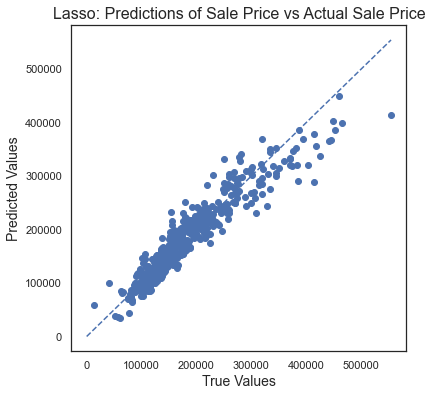

In [153]:
# Plot Lasso's predicted values against true values
lasso_preds = lasso.predict(X_test)
plt.figure(figsize = (6, 6))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, lasso.predict(X_test))

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(lasso_preds))],
         [0, max(max(y_test),max(lasso_preds))],
         linestyle = '--')

# Set title and labels
plt.title('Lasso: Predictions of Sale Price vs Actual Sale Price', fontsize = 16)
plt.xlabel('True Values', fontsize = 14)
plt.ylabel('Predicted Values', fontsize = 14)

# Save plot
plt.savefig('../plots/lasso_preds.png', dpi=150, bbox_inches='tight')

Other than 1 outlier in the extreme sale price range, the best fit passes through most of the points.

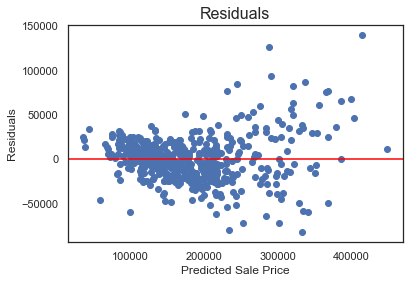

In [154]:
# PLot residuals
residuals = y_test - lasso_preds

plt.scatter(lasso_preds, residuals)
plt.axhline(y=0, c='red')
plt.xlabel('Predicted Sale Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals', fontsize=16)

# Save plot
plt.savefig('../plots/lasso_residuals.png', dpi=150, bbox_inches='tight')

The residuals are mostly equally distributed, with few outliers. 

### 5.4 Coefficients of Selected Model

Let us look at the top predictors of sale prices.

In [155]:
# Create dataframe of coefficients
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

# Display top 10 positive coefficients 
lasso_coefs.sort_values('coef', ascending=False, inplace=True)
lasso_coefs.reset_index(drop=True, inplace=True)
lasso_coefs.head(10)

variable          coef      abs_coef
0           gr_liv_area  20465.311010  20465.311010
1          overall_qual  15287.806891  15287.806891
2  neighborhood_NridgHt  11128.908450  11128.908450
3            exter_qual   8201.070013   8201.070013
4  neighborhood_StoneBr   8159.998905   8159.998905
5           garage_cars   6243.391359   6243.391359
6         bsmt_exposure   5782.023900   5782.023900
7        ms_subclass_20   5085.726952   5085.726952
8  neighborhood_NoRidge   4755.645832   4755.645832
9         sale_type_New   4714.488982   4714.488982

In [156]:
# Display top 20 negative coefficients 
lasso_coefs.sort_values('coef', inplace=True)
lasso_coefs.head(10)

variable         coef     abs_coef
126  neighborhood_Edwards -3166.172405  3166.172405
125          property_age -3060.108271  3060.108271
124      land_contour_Bnk -2880.791539  2880.791539
123       ms_subclass_160 -2812.579991  2812.579991
122       ms_subclass_120 -2799.587174  2799.587174
121    neighborhood_NAmes -2117.042322  2117.042322
120  exterior_1st_HdBoard -2099.723749  2099.723749
119  neighborhood_OldTown -2094.007497  2094.007497
118  neighborhood_Gilbert -2013.297343  2013.297343
117             pool_area -1742.743763  1742.743763

The top 10 predictive features for sale price are related to the following themes:

**1) Living Area** -
The larger the ground living area, the higher the predicted sale price of the house. Features like exterior quality and the number of cars that a garage can fit are also key factors influencing sale price positively. 

**2) Overall Quality** -
The overall quality and external quality of the house is also a strong predictor of price. The better the quality, the higher the predicted sale price. Houses with exposed basements could also fetch higher prices, likely because they could be more well-ventilated. 

**3) Location** -
Sale price for houses in certain neighborhoods like Northridge Heights, Stone Brook and Northridge, tend to be predicted higher. On the other hand, sale price for houses in neighborhoods like Edwards, North Ames, Old Town and Gilbert tend to be predicted lower. 

**4) Property Age** -
Unsurprisingly, sale price for newer houses are predicted to be higher. This is especially so 1-storey houses that are built after 1946 (as indicated by 'ms_subclass_20'). Older houses have higher negative coefficient while newer houses have higher positive coefficient. 

**5) Housing Type** -
Generally, houses built after 1946 are predicted to have higher sale price, except for 1 or 2-storey Planned Unit Developments (PUD) (as indicated by 'ms_subclass_160' and 'ms_subclass_120'). 

Lasso regression also penalizes the sum of absolute values of the coefficients (L1 penalty) and had shrunk 36 of the coefficient estimates, with minor contributions to the model, to be exactly equal to zero. As a re-run of the model after dropping the 36 features with zero coefficients did not yield better predictions, no further modifications have been done to the model. 

In [157]:
# Remaining features after zeroing by lasso regression
print('Total Features before Lasso regression:', len(features))
print('Features Zeroed by Lasso regression:', len(lasso.coef_[lasso.coef_ == 0]))
print('Features Remaining after Lasso regression:', len(features) - len(lasso.coef_[lasso.coef_ == 0]))

Total Features before Lasso regression: 127
Features Zeroed by Lasso regression: 36
Features Remaining after Lasso regression: 91


In [158]:
# Create a list of features with zerorised coefficient 
lasso_coefs[lasso_coefs['coef']== 0]

variable  coef  abs_coef
65         open_porch_sf   0.0       0.0
66    garage_type_Detchd  -0.0       0.0
67         garage_yr_blt   0.0       0.0
68         garage_finish  -0.0       0.0
69            2nd_flr_sf  -0.0       0.0
70           paved_drive   0.0       0.0
71         total_bsmt_sf   0.0       0.0
72      land_contour_Lvl  -0.0       0.0
73        enclosed_porch  -0.0       0.0
74    garage_type_Attchd  -0.0       0.0
75               mo_sold  -0.0       0.0
77         kitchen_abvgr  -0.0       0.0
64      roof_style_Gable  -0.0       0.0
79        ms_subclass_85   0.0       0.0
80       ms_subclass_190  -0.0       0.0
81          ms_zoning_RL   0.0       0.0
82          ms_zoning_RM  -0.0       0.0
83            exter_cond   0.0       0.0
84            alley_Grvl  -0.0       0.0
85            alley_Pave  -0.0       0.0
86     foundation_CBlock  -0.0       0.0
87        bsmt_half_bath  -0.0       0.0
76         central_air_Y  -0.0       0.0
78        ms_subclass_70  -0.0       0.0
63     lot_config_Corner  -0.0       0.0
61  exterior_1st_Plywood   0.0       0.0
52  neighborhood_BrkSide   0.0       0.0
53  neighborhood_Blmngtn  -0.0       0.0
54      condition_1_RRAn   0.0       0.0
55  exterior_2nd_Wd Shng  -0.0       0.0
62  exterior_1st_MetalSd   0.0       0.0
57  neighborhood_MeadowV  -0.0       0.0
58  neighborhood_Mitchel   0.0       0.0
59  exterior_1st_WdShing  -0.0       0.0
60  exterior_1st_VinylSd   0.0       0.0
56  exterior_2nd_BrkFace   0.0       0.0

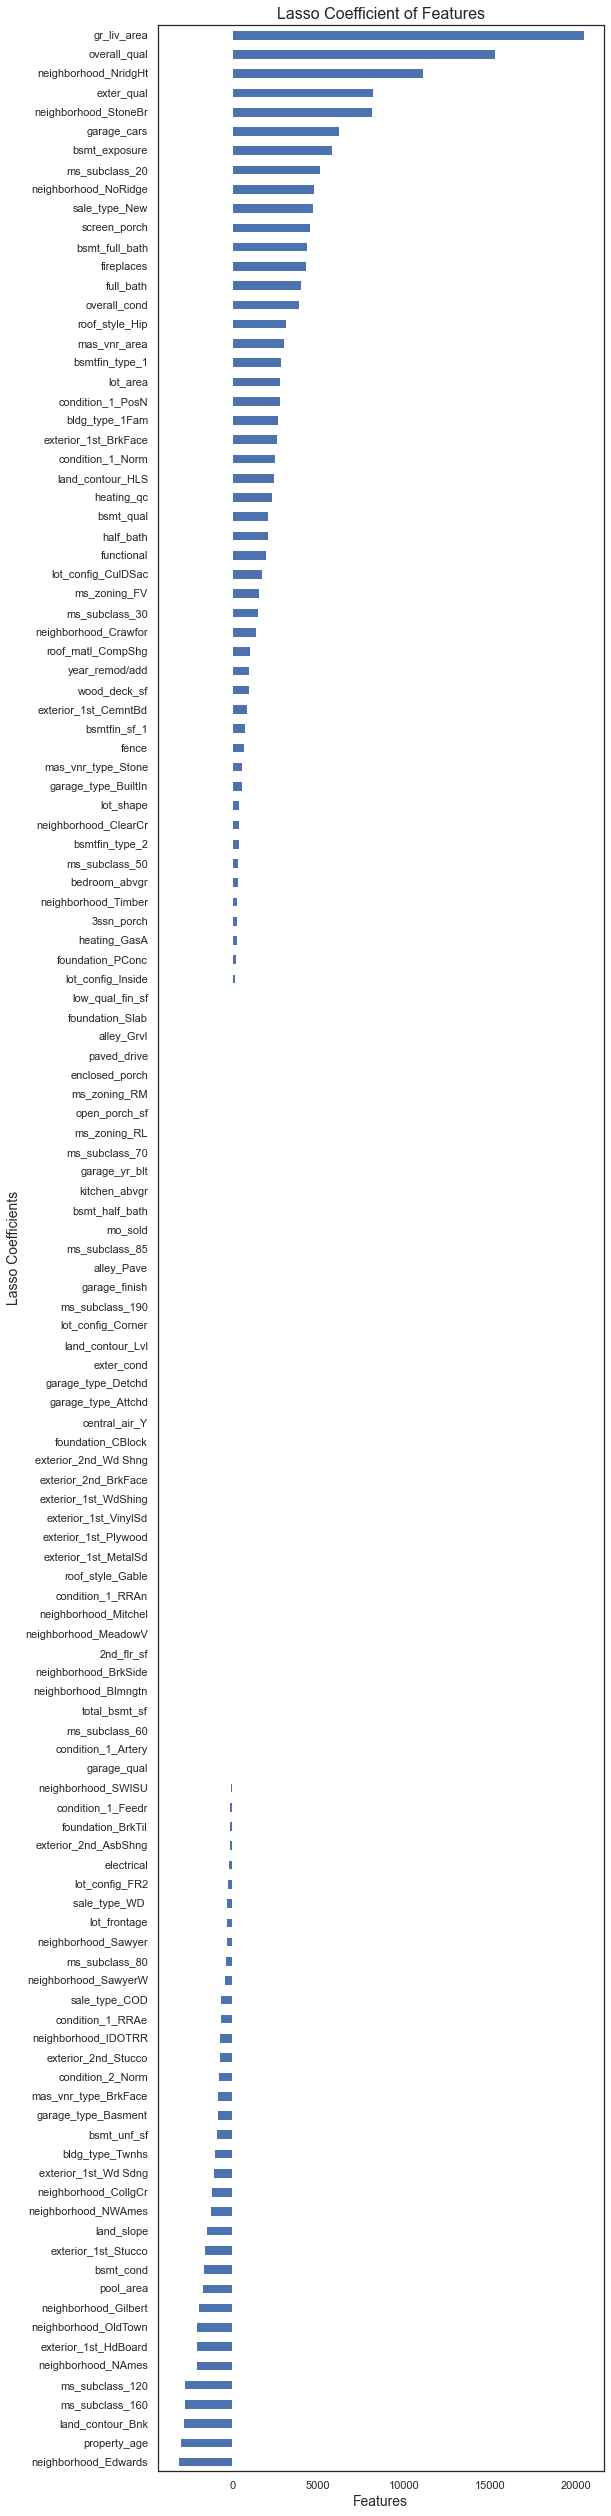

In [159]:
# Plot all features and lasso coefficients
pd.Series(lasso.coef_, index=features).sort_values().plot.barh(figsize=(8,45))
plt.title('Lasso Coefficient of Features', fontsize = 16)
plt.xlabel('Features', fontsize = 14)
plt.ylabel('Lasso Coefficients', fontsize = 14)

# Save plot
plt.savefig('../plots/lasso_coeff.png', dpi=150, bbox_inches='tight')
plt.show()

## 6.Conclusion and Recommendations 

### 6.1 Selected Model

Overall, we had selected **Lasso Regression** as our best model for deployment to predict the sale price. 

The testing dataset (25%) performed within expectations, returning an RMSE of 25961 which is only slightly lower than the training dataset's RMSE of 27064. 

This is a strong improvement over the baseline RMSE (79061) generated by using the mean of all sale prices as predictions. 

There is also a high R2 on our training (0.8835) and testing dataset (0.8921), where it can explain up to 88.35% and 89.21% of the variance in sale price of the fitted data. Since both R2 scores are quite close, the model is rather generalisable. 

The cross-validation scores for all 3 models are close and robust. Though the cross-validation scores for Lasso Regression (R2 = 0.8445, RMSE = 31108) is not the best compared to Ridge Regression(R2 = 0.8448, RMSE = 31027), they are better than Linear Regression (R2 = 0.8384, RMSE = 31558). 

### 6.2 Recommendations

The property price prediction model can help provide a more data-driven advice to prospective home sellers and buyers. 

Besides predicting the estimated sale price, brokers can use insights from the model to advise home sellers that buyers are willing to pay a premium for the following features: 

**1) Living Area** - The larger the ground living area, the higher the predicted sale price of the house. Features like the number of cars that a garage can fit is also a key factor influencing sale price positively. 

**2) Overall Quality** - The overall quality and external quality of the house are strong predictor of price. The better the quality, the higher the predicted sale price. Houses with exposed basements could also fetch higher prices, likely because they could be more well-ventilated. 

**3) Location** - Sale price for houses in certain neighborhoods like Northridge Heights, Stone Brook and Northridge, tend to be predicted higher. On the other hand, sale price for houses in neighborhoods like Edwards, North Ames, Old Town and Gilbert tend to be predicted lower. 

**4) Property Age** - Unsurprisingly, sale price for newer houses are predicted to be higher. This is especially so for 1-storey houses that are built after 1946. 

**5) Housing Type** - Generally, houses built after 1946 are predicted to have higher sale price, except for 1 or 2-storey Planned Unit Developments (PUD). 



Brokers can also advise prospective home sellers looking to increase the value of his or her house to do the following:

1) Remodel their house by expanding the living area and garage size and incorporating exposed basement

2) Improve overall and exterior quality of their house through renovation 
    
By taking into account certain features of a home that home buyers are looking for, brokers can also use the model to advise home buyers if the budget they have in mind is sufficient. 

### 6.3 Model Limitations and Future Steps

The model is not generalizable to other cities, given that each city tends to differ in terms of external factors like geographical features, weather or the economic climate, etc.

The sale prices are only accurate to a certain extent due to the lack of recent sales data. A real-time machine-learning model with access to a continuous flow of transactional data would be necessary to keep the model updated. Data collection could be improved to deal with the missing data fields upfront. 

As location is one of the top feature, the data collection of the proximities of amenities (such as schools, supermarkets and restaurants) could be included to further narrow down the neighbourhood features that has a high correlation with the sale prices of properties.

## 7.Appendix

### 7.1 Submission

Lastly, we want to deploy our model to predict the sale prices of the 'test' dataset and submit our predictions to Kaggle.

In [160]:
# Refit lasso model on full 'train' dataset
X_scaled = ss.fit_transform(X)
lasso = LassoCV()
lasso.fit(X_scaled, y)
lasso.score(X_scaled,y)

0.8873232288894212

In [161]:
# Make predictions using 'test' dataset
final_test_scaled = ss.transform(test_final)

In [162]:
# Predicted sale prices
final_predictions = lasso.predict(final_test_scaled)
final_predictions

# Submission of final predictions to kaggle was not possible as the competition was closed

array([144332.71652921, 149033.40776407, 230095.29638829, 117773.50231866,
       189620.30059721,  81715.9977257 , 102882.05287671, 152272.29047188,
       177269.23249198, 174448.80396579, 143080.33248439, 127335.08226679,
       151505.25133852, 284130.67218335, 139616.82453907, 125063.5457543 ,
       147114.16414181, 120835.87314682, 195341.6382724 , 192109.77496161,
       156484.54641489, 126021.93394859, 172556.59202401, 177287.65056938,
       180153.97211207, 124822.59925453, 116889.95681535, 113491.95918134,
       157555.82682226,  54623.65150918,  92437.86664637, 107268.4079968 ,
       216635.9280278 , 146517.00494967, 221436.36567485, 179572.6977319 ,
       120092.91286836,  86826.41458056, 142926.1441679 , 197509.98662423,
       173938.3795756 , 202433.03149371, 146425.67290977, 191594.01400071,
       214255.35256063,  85086.65253773, 224351.96094209, 125785.2987    ,
       136825.12354096, 113992.33351714, 102471.60445858, 219071.12408804,
       238699.16303652, 1